# CDOM Data Analysis
This is code for analysing CDOM data from 3 different algorithms.
Monthly averages, anomalies, and variance are calculated.
There are time series, box plots, scatter plots, histograms, monthly anomalies and FFTs.
The CDOM data is also compared to kd490 and climate data

In [1]:
#numeric python module, useful for handling large data arrays
import numpy as np

import pandas as pd

#module for dealing with netCDF files (all sat files are netCDF)
import netCDF4 as nc

#modules for making plots. Here wer are importing the full matplotlib
#module, but also the sub-module pyplot separately with an abbreviated
#name so it is easier to use in the code
import matplotlib.pyplot as plt
import matplotlib

#panda
import pandas as pd


#import datetime
import datetime
from datetime import datetime

#for displaying the plots in this notebook 
%matplotlib inline

#module for making maps
from mpl_toolkits.basemap import Basemap

#miscellaneous operating system interfaces module for doing things like
#moving file, exploring directory paths, etc..
import os
import re


In [2]:
#specify the directory where all the files are saved
cdom_giopdir= '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/giop'

#list all the files in the directory using the os module
cdom_giop_all=os.listdir(cdom_giopdir)



In [3]:
wd = os.chdir(cdom_giopdir)
cwd = os.getcwd()
print (cwd)

/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/giop


## Average across entire GoM for each month (file)
this code calculates the monthly averages for each algorithm and for the GNATS data

In [4]:
##this loop calculates the average across the GoM for each month
#number of files
numfiles = len(cdom_giop_all)
       
#looping through each file, doing as detailed in the above 
#section for subsetting data

cdomgiop_avg = []
cdomgiop_std = []
cdomgiop_var = []
x = []
y = []
for yr in range(2003,2017):  
    fn = 'adg443.giop_subset_data_'+ str(yr)
    
    for mn in range (1,13):
        fnm = fn + '_' + str(mn)
        #print (fnm) ##this gives all the files names
            
        #data = open(fnm,'r')
        data = np.loadtxt(fnm)
        #data = np.genfromtxt(fnm)
        #print (data)              ##here is where it goes to only the 12th month

        data_=np.array(data).astype(np.float)
        #print (data_)

        ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
        #print (ma)

        avg = np.nanmean(ma)
        #print (avg)
        std = np.nanstd (ma)
        #print (std) 
        var = np.nanvar(ma)

        cdomgiop_avg += [avg]
        cdomgiop_std += [std]
        cdomgiop_var += [var]
        
        #this is creating the dates for the x axis of the time series
        time = str(mn) + '_' + str(yr)
        date = datetime.strptime(time, '%m_%Y')
        x.append(date)
        y.append(str(yr)+'_'+str(mn))

d = {'B':cdomgiop_avg,'A':y}
df_cdom = pd.DataFrame(data=d)
header = ['A','B']
df_cdom.to_csv("df_cdom.csv",columns=header)
#print(df_cdom)


    #print (cdomgiop_avg)
    #print (cdomgiop_std) 
#print (x)

In [5]:
##THIS IS FOR THE GSM ALGORITHM
#specify the directory where all the files are saved
cdom_gsmdir= '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/gsm'

#list all the files in the directory using the os module
cdom_gsm_all=os.listdir(cdom_gsmdir)

wd = os.chdir(cdom_gsmdir)
cwd = os.getcwd()
print (cwd)

/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/gsm


In [6]:
##this loop calculates the average across the GoM for each month
#number of files
numfiles = len(cdom_gsm_all)
       
#looping through each file, doing as detailed in the above 
#section for subsetting data

cdomgsm_avg = []
cdomgsm_std = []
x = []
for yr in range(2003,2017):  
    fn = 'adg443.gsm_subset_data_'+ str(yr)
    
    for mn in range (1,13):
        fnm = fn + '_' + str(mn)
        #print (fnm) ##this gives all the files names
            
        #data = open(fnm,'r')
        data = np.loadtxt(fnm)
        #data = np.genfromtxt(fnm)
        #print (data)              ##here is where it goes to only the 12th month

        data_=np.array(data).astype(np.float)
        #print (data_)

        ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
        #print (ma)

        avg = np.nanmean(ma)
        #print (avg)
        std = np.nanstd (ma)
        #print (std) 


        cdomgsm_avg += [avg]
        cdomgsm_std += [std]

        #this is creating the dates for the x axis of the time series
        time = str(mn) + '_' + str(yr)
        date = datetime.strptime(time, '%m_%Y')
        x.append(date)


        #date = ' '.join(x)


    #print (cdomgsm_avg)
    #print (cdomgsm_std) 
    #print (x)
    
d = {'B':cdomgsm_avg,'A':y}
df_gsm = pd.DataFrame(data=d)
#print(df_cdom)

In [7]:
##THIS IS FOR THE QAA ALGORITHM
#specify the directory where all the files are saved
cdom_qaadir= '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/qaa'

#list all the files in the directory using the os module
cdom_qaa_all=os.listdir(cdom_qaadir)

wd = os.chdir(cdom_qaadir)
cwd = os.getcwd()
print (cwd)

/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/qaa


In [8]:
##this loop calculates the average across the GoM for each month
#number of files
numfiles = len(cdom_qaa_all)
       
#looping through each file, doing as detailed in the above 
#section for subsetting data

cdomqaa_avg = []
cdomqaa_std = []
x = []
for yr in range(2003,2017):  
    fn = 'adg443.qaa_subset_data_'+ str(yr)
    
    for mn in range (1,13):
        fnm = fn + '_' + str(mn)
        #print (fnm) ##this gives all the files names
            
        #data = open(fnm,'r')
        data = np.loadtxt(fnm)
        #data = np.genfromtxt(fnm)
        #print (data)              ##here is where it goes to only the 12th month

        data_=np.array(data).astype(np.float)
        #print (data_)

        ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
        #print (ma)

        avg = np.nanmean(ma)
        #print (avg)
        std = np.nanstd (ma)
        #print (std) 


        cdomqaa_avg += [avg]
        cdomqaa_std += [std]

        #this is creating the dates for the x axis of the time series
        time = str(mn) + '_' + str(yr)
        date = datetime.strptime(time, '%m_%Y')
        x.append(date)


        #date = ' '.join(x)


   
   
    #print (x)
d = {'B':cdomqaa_avg,'A':y}
df_qaa = pd.DataFrame(data=d)
#print(df_cdom)

In [9]:
print(len(cdomqaa_avg))
print(len(x))

168
168


In [10]:
##THIS IS FOR THE GNATS
#specify the directory where all the files are saved
cdom_gnatsdir= '/Users/clarabirdferrer/Documents/Bigelow/Data/GNATS'


wd = os.chdir(cdom_gnatsdir)
cwd = os.getcwd()
print (cwd)

from pandas import DatetimeIndex

##GNATS shipboard data
#1.import txt file
fn= 'GNATS_date_cdom.txt'
df = pd.read_csv('GNATS_date_cdom.csv',sep=",",header = (1), names=['date','cdom'])
#print(df)

#2.convert all -999 cdom data points into nan
ag = df['cdom']
ag[ag < 0] = np.nan
#print(df)

#3.convert date to actual date
dd= df['date'].astype(str).str[:-9].astype(str)     #pulls out the 8 digit string and eliminates the timestamp string
df['date']=dd
#print(df['date'])
dt = pd.to_datetime(df['date'],format='%Y-%m-%d')
#print(dt)
#dft = df.set_index(dt[1])
#data.index = pd.to_datetime(data.index,unit='m')
df['date']=dt
#print(df)                                         ###still have 2 columns here
#print(df.dtypes)                                 

#4.take monthly averages and put in list
#get rid of nan
na = df.dropna(axis=0,how='any')
#print(na.shape)                                         ###still have 2 columns here
#print(na.dtypes)

b = na.resample('1M',how='mean',on='date')              ##calculates mean #go down to one column here
#print(len(b.columns))
c = na.resample('1M',how='std',on='date')    ##calculates standard dev

np.set_printoptions(threshold=np.inf)       ##this lets you print more lines to see the full data frame
pd.options.display.max_rows = 4000
a = b.dropna(axis=0,how='any')               #means w/o nan
#print(a.shape)
print(a)

d = c.dropna(axis=0,how='any')                #standard dev w/o nan

#save a to txt file which turns out to just hold dates, means and the standard dev

#datafile = '/Users/clarabirdferrer/Documents/Bigelow/Data/GNATS/gnats_dates.txt'
#np.savetxt(datafile,d['date'],fmt='%.6f')

datafile = '/Users/clarabirdferrer/Documents/Bigelow/Data/GNATS/means.txt'
np.savetxt(datafile,a,fmt='%.6f')

datafile = '/Users/clarabirdferrer/Documents/Bigelow/Data/GNATS/std.txt'
np.savetxt(datafile,d,fmt='%.6f')

#load that same txt file
fn = 'means.txt'
cdomgnats_avg = np.loadtxt(fn)
#print(cdomgnats_avg)
ff = 'std.txt'
cdomgnats_std = np.loadtxt(ff)

#f = 'gnats_dates.txt'
#cdomgnats_dates = np.loadtxt(f)

#select dates that line up with a
#gnats_dates = df.loc[df['date'].isin(a)]


##saving gnats avg and dates into file together
#d = {'B':cdomgnats_avg,'A':gnats_dates}
#df_gnats = pd.DataFrame(data=d)

#datafile = '/Users/clarabirdferrer/Documents/Bigelow/Data/GNATS/gnats_df'
#np.savetxt(datafile,df_gnats,fmt='%.6f')
       

/Users/clarabirdferrer/Documents/Bigelow/Data/GNATS
                cdom
date                
2003-05-31  0.116337
2003-06-30  0.089518
2003-07-31  0.093453
2003-08-31  0.093253
2003-09-30  0.098176
2003-10-31  0.092198
2004-05-31  0.084275
2004-06-30  0.133387
2004-07-31  0.084942
2004-08-31  0.251704
2004-09-30  0.131637
2005-06-30  0.235002
2005-07-31  0.122558
2005-09-30  0.092860
2005-10-31  0.129103
2006-02-28  0.103511
2006-06-30  0.234163
2006-08-31  0.192271
2006-09-30  0.141475
2007-05-31  0.192687
2007-06-30  0.108774
2007-07-31  0.091118
2007-08-31  0.127469
2007-09-30  0.101426
2008-01-31  0.100766
2008-04-30  0.085824
2008-05-31  0.147616
2008-06-30  0.113203
2008-07-31  0.093989
2008-08-31  0.171579
2008-09-30  0.136849
2009-04-30  0.164398
2009-06-30  0.111253
2009-07-31  0.158516
2009-08-31  0.145111
2009-09-30  0.115359
2009-10-31  0.123443
2009-11-30  0.104323
2010-03-31  0.047789
2010-05-31  0.081322
2010-07-31  0.117975
2010-10-31  0.100041
2012-01-31  0.095209
201

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).std()


#### plotting the GNATS data time series

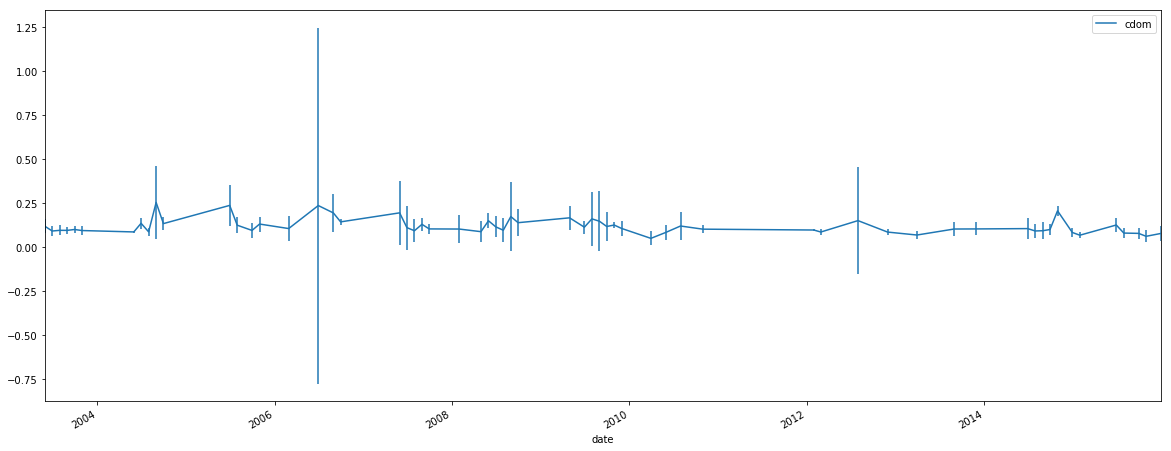

In [11]:
##Plot the GNATS data w/ standard deviation bars
a.plot(figsize=(20,8),yerr=d)
#saving the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/cdomgnats_stdev_timeseries'
plt.savefig(filename1+'.tif',dpi=300)

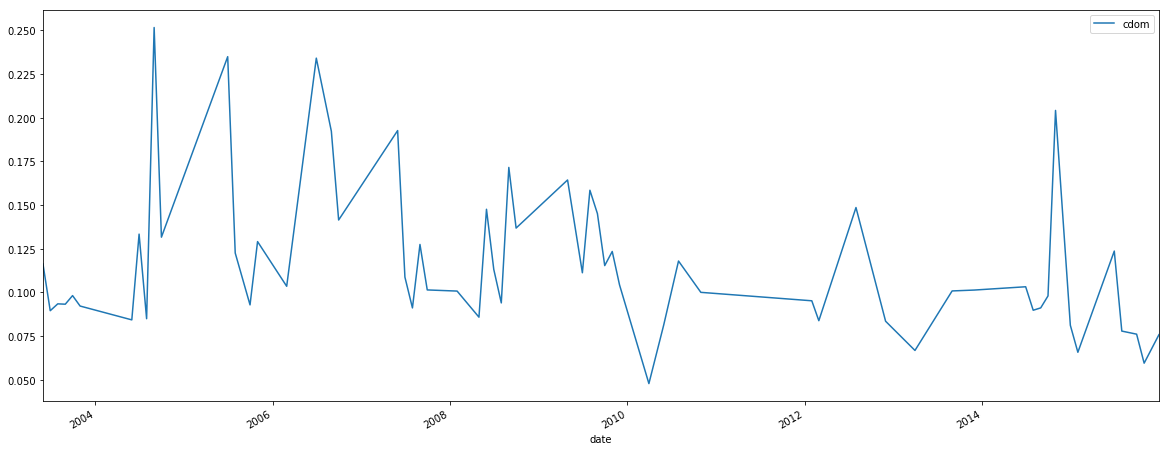

In [12]:
##Plot the GNATS data
a.plot(figsize=(20,8))
#saving the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/cdomgnats_timeseries'
plt.savefig(filename1+'.tif',dpi=300)

## this is a section setting up the data from the different algs to be compared to GNATS

In [13]:
#GIOP
#import gnats months data w/ 2 columns
fn = '/Users/clarabirdferrer/Documents/Bigelow/Data/GNATS/gnats_avgs1.txt'
gnats_avg = pd.read_csv(fn,sep=' ',header =1, names=['date','cdom'],usecols=(0,2))
#print(gnats_avg)
                                                                     
#this loop takes all the dates from the cdom df and makes them comparable to the dates from the gnats df
cd = []
for ii in df_cdom['A']:
    #print(ii)
    m = ii[5:]
    mn = m[:2]
    y = ii[:4]
    #print (y)
    
    if mn == '1':
        m = '01'
    elif mn == '2':
        m = '02'
    elif mn == '3':
        m = '03'
    elif mn == '4':
        m = '04'
    elif mn == '5':
        m = '05'
    elif mn == '6':
        m = '06'
    elif mn == '7':
        m = '07'
    elif mn == '8':
        m = '08'
    elif mn == '9':
        m = '09'
        
    #print (m)
    
    ym = y + '-' + m
    #print(ym)
    
    cd += [ym]
#print(date)

df_cdom['A'] = cd
#print(df_cdom)

#this loop takes all the dates from the gnats df and makes them comparable to the cdom
gd = []
for i in gnats_avg['date']:
    m = i[5:]
    mn = m[:2]
    y = i[:4]
    #print (y)
    #print (mn)
    
    ym = y + '-' + mn
    
    gd += [ym]

gnats_avg['date'] = gd
#print(gnats_avg.shape)
   
#ok so now we have the dates for gnats and cdomgiop data in the same format
#now we need to select for the cdomgiop data points that have same dates in gnats
cdomgiop_gnats = df_cdom.loc[df_cdom['A'].isin(gnats_avg['date'])]
#print(cdomgiop_gnats)

In [14]:
#GSM
#import gnats months data w/ 2 columns
fn = '/Users/clarabirdferrer/Documents/Bigelow/Data/GNATS/gnats_avgs1.txt'
gnats_avg = pd.read_csv(fn,sep=' ',header =1, names=['date','cdom'],usecols=(0,2))
#print(gnats_avg)
                                                                     
#this loop takes all the dates from the cdom df and makes them comparable to the dates from the gnats df
cd = []
for ii in df_gsm['A']:
    #print(ii)
    m = ii[5:]
    mn = m[:2]
    y = ii[:4]
    #print (y)
    
    if mn == '1':
        m = '01'
    elif mn == '2':
        m = '02'
    elif mn == '3':
        m = '03'
    elif mn == '4':
        m = '04'
    elif mn == '5':
        m = '05'
    elif mn == '6':
        m = '06'
    elif mn == '7':
        m = '07'
    elif mn == '8':
        m = '08'
    elif mn == '9':
        m = '09'
        
    #print (m)
    
    ym = y + '-' + m
    #print(ym)
    
    cd += [ym]
#print(date)

df_gsm['A'] = cd
#print(df_cdom)

#this loop takes all the dates from the gnats df and makes them comparable to the cdom
gd = []
for i in gnats_avg['date']:
    m = i[5:]
    mn = m[:2]
    y = i[:4]
    #print (y)
    #print (mn)
    
    ym = y + '-' + mn
    
    gd += [ym]

gnats_avg['date'] = gd
#print(gnats_avg.shape)
   
#ok so now we have the dates for gnats and cdomgiop data in the same format
#now we need to select for the cdomgiop data points that have same dates in gnats
cdomgsm_gnats = df_gsm.loc[df_gsm['A'].isin(gnats_avg['date'])]
#print(cdomgiop_gnats)

In [15]:
#QAA
#import gnats months data w/ 2 columns
fn = '/Users/clarabirdferrer/Documents/Bigelow/Data/GNATS/gnats_avgs1.txt'
gnats_avg = pd.read_csv(fn,sep=' ',header =1, names=['date','cdom'],usecols=(0,2))
#print(gnats_avg)
                                                                     
#this loop takes all the dates from the cdom df and makes them comparable to the dates from the gnats df
cd = []
for ii in df_qaa['A']:
    #print(ii)
    m = ii[5:]
    mn = m[:2]
    y = ii[:4]
    #print (y)
    
    if mn == '1':
        m = '01'
    elif mn == '2':
        m = '02'
    elif mn == '3':
        m = '03'
    elif mn == '4':
        m = '04'
    elif mn == '5':
        m = '05'
    elif mn == '6':
        m = '06'
    elif mn == '7':
        m = '07'
    elif mn == '8':
        m = '08'
    elif mn == '9':
        m = '09'
        
    #print (m)
    
    ym = y + '-' + m
    #print(ym)
    
    cd += [ym]
#print(date)

df_qaa['A'] = cd 
#print(df_cdom)

#this loop takes all the dates from the gnats df and makes them comparable to the cdom
gd = []
for i in gnats_avg['date']:
    m = i[5:]
    mn = m[:2]
    y = i[:4]
    #print (y)
    #print (mn)
    
    ym = y + '-' + mn
    
    gd += [ym]

gnats_avg['date'] = gd
#print(gnats_avg.shape)
   
#ok so now we have the dates for gnats and cdomgiop data in the same format
#now we need to select for the cdomgiop data points that have same dates in gnats
cdomqaa_gnats = df_qaa.loc[df_qaa['A'].isin(gnats_avg['date'])]
#print(cdomgiop_gnats)

## processing climate data (precip)

In [16]:
##THIS IS FOR THE CLIMATE DATA
#specify the directory where all the files are saved
clim_dir= '/Users/clarabirdferrer/Documents/Bigelow/Data/climate'


wd = os.chdir(clim_dir)
cwd = os.getcwd()
print (cwd)

from pandas import DatetimeIndex


##import txt file
fn= 'NCD_PRCP.csv'
data = np.genfromtxt(fn,delimiter=',')
#print(data)


##convert all -9999 data points into nan
prcp = data[:,1]
prcp[prcp < -9000] = np.nan
#print(prcp)


##convert date to actual date
date = data[:,0]
#print(date)
date = list(date)
dt = pd.to_datetime(date,format='%Y%m%d')
#print(dt)

##combine dates and prcp
d = {'B':prcp,'A':dt}
df = pd.DataFrame(data=d)
#print(df)


#take monthly averages and put in list
na = df.dropna(axis=0,how='any')
#print(na)                                         ###still have 2 columns here
#print(na.dtypes)

b = na.resample('1M',how='mean',on='A')              ##calculates mean #go down to one column here
#print(len(b.columns))
c = na.resample('1M',how='std',on='A')    ##calculates standard dev

m = b.dropna(axis=0,how='any') #means w/o nan
#print(a)
n = c.dropna(axis=0,how='any') #standard dev w/o nan

#save a to txt file which turns out to just hold means and the standard dev
datafile = '/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_means.txt'
np.savetxt(datafile,m,fmt='%.6f')

datafile = '/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_std.txt'
np.savetxt(datafile,n,fmt='%.6f')


/Users/clarabirdferrer/Documents/Bigelow/Data/climate


/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).std()


## Time Series

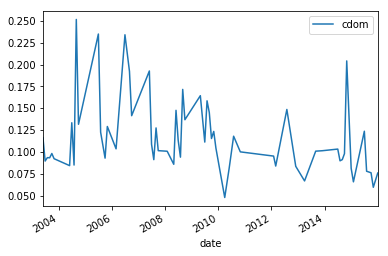

In [17]:
##Plot the GNATS data
#importing the data
ff = '/Users/clarabirdferrer/Documents/Bigelow/Data/GNATS/std.txt'
d = np.loadtxt(ff)


#plotting
a.plot()
#saving the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/cdomgnats_timeseries'
plt.savefig(filename1+'.tif',dpi=300)

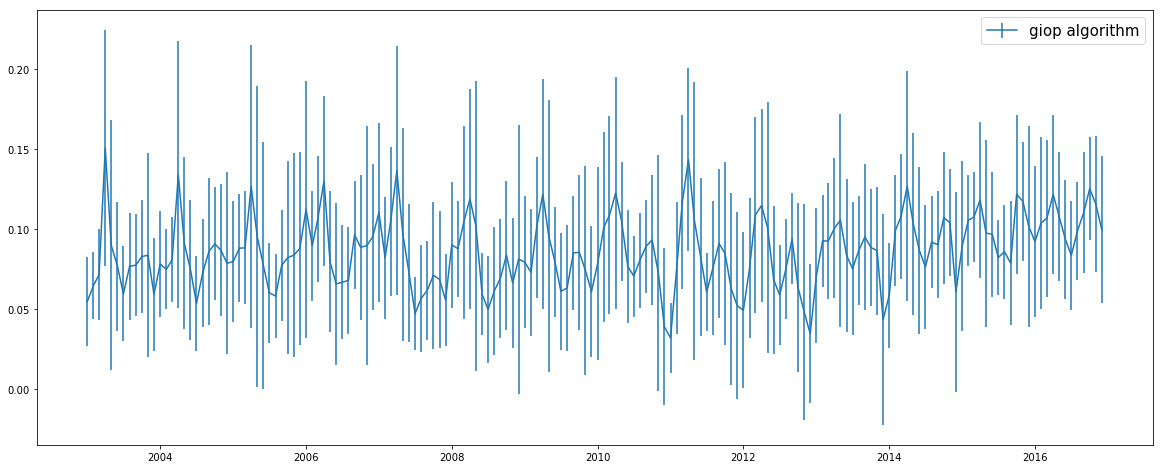

In [18]:
##plotting time series
#GIOP
fig1 = plt.figure(figsize=(20,8)) 
#plt.plot(x,cdomgiop_avg)
plt.errorbar(x,cdomgiop_avg,yerr = cdomgiop_std)
plt.legend(['giop algorithm'],prop={'size':15})
#plt.xticks(
plt.xlabel = 'Time (months)'
plt.ylabel = 'CDOM (adg443, giop)'
plt.title = 'Time Series of CDOM in the Gulf of Maine from 2003-2013'


#saving the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/cdomgiop_timeseries'
plt.savefig(filename1+'.tif',dpi=300)



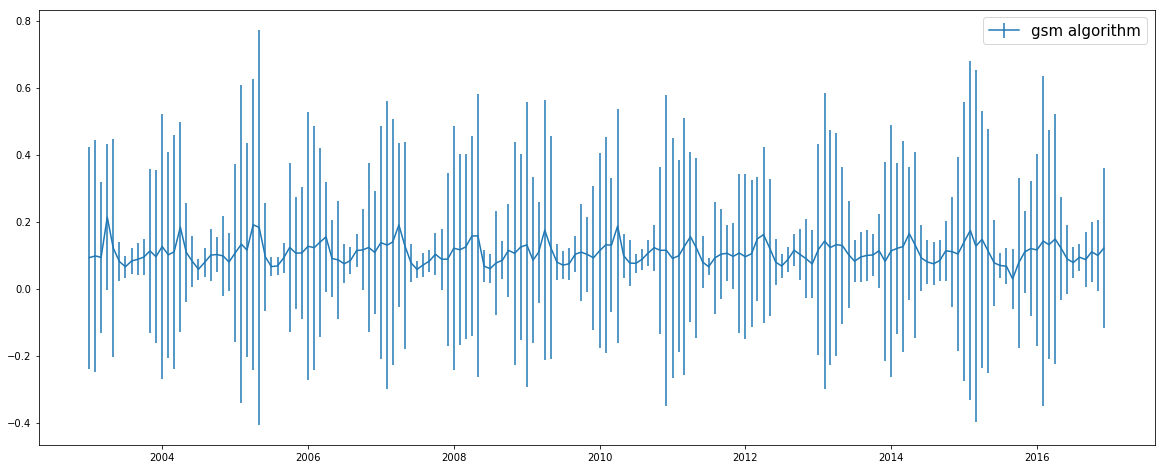

In [19]:
#GSM
fig1 = plt.figure(figsize=(20,8))
plt.errorbar(x,cdomgsm_avg,yerr = cdomgsm_std)
plt.legend(['gsm algorithm'],prop={'size':15})
#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/cdomgsm_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)


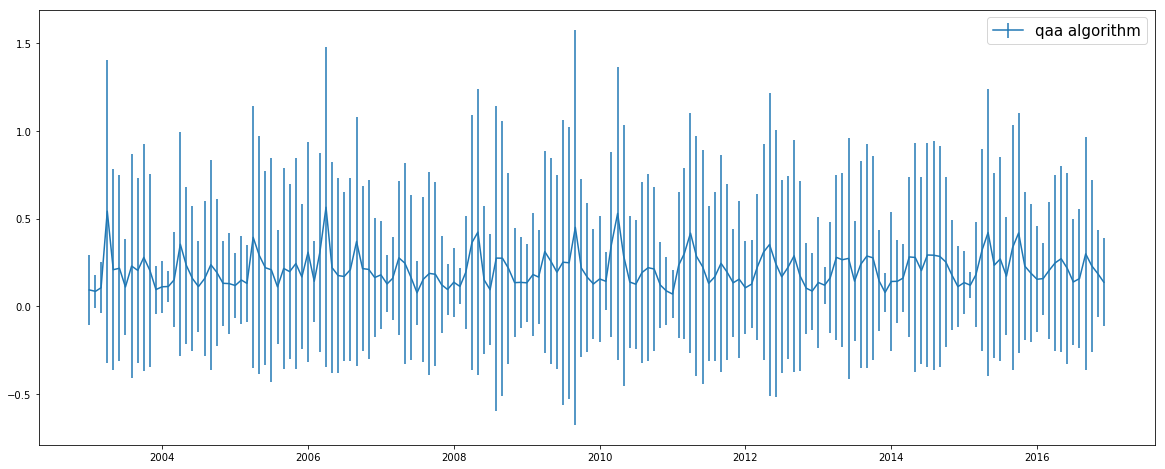

In [20]:
#QAA
fig1 = plt.figure(figsize=(20,8))
plt.errorbar(x,cdomqaa_avg,yerr = cdomqaa_std)
plt.legend(['qaa algorithm'],prop={'size':15})
#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/cdomqaa_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)


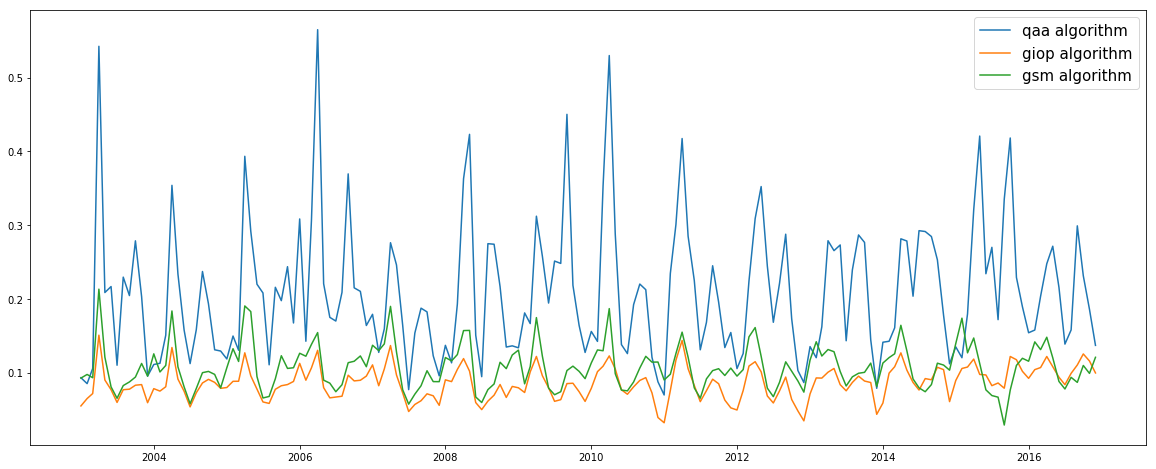

In [21]:
##compare all 3 algorithms
fig1 = plt.figure(figsize=(20,8))
plt.plot(x,cdomqaa_avg)
plt.plot(x,cdomgiop_avg)
plt.plot(x,cdomgsm_avg)
plt.legend(['qaa algorithm','giop algorithm','gsm algorithm'],prop={'size':15})

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/cdom_algcompare_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

In [22]:
years = []
for i in x:
    i = str(i)
    mon = i[5:]
    month = mon[:2]
    year = i[:4]
    #print(month)
    mont = int(month)
    if mont == 12:
        years += [year]
#print(years)

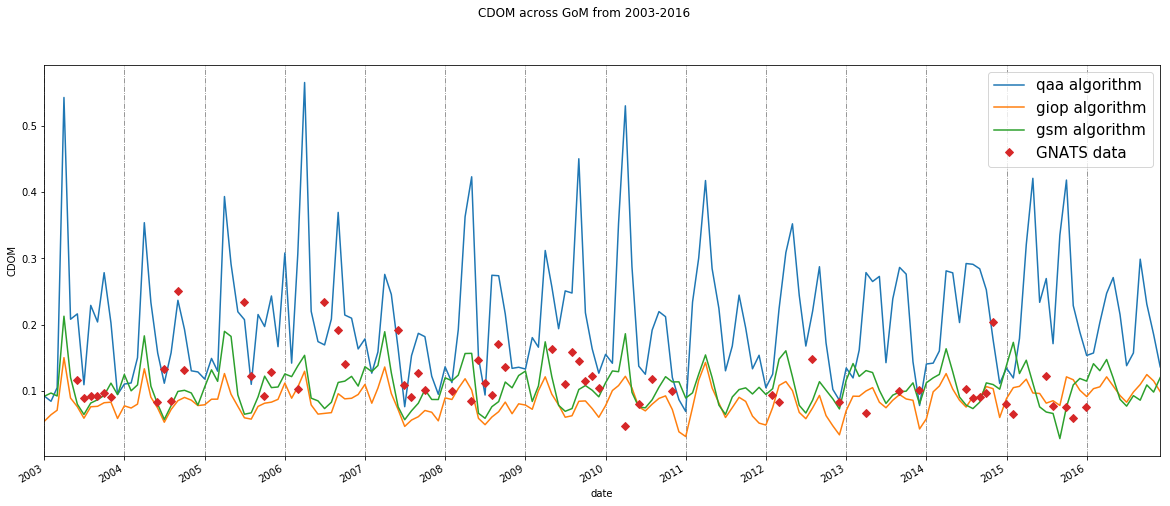

In [23]:
fig = plt.figure(figsize=(20,8))
fig,ax = plt.subplots(figsize=(20,8))
ax.plot_date(x,cdomqaa_avg,linestyle='solid',marker=None)
ax.plot_date(x,cdomgiop_avg,linestyle='solid',marker=None)
ax.plot_date(x,cdomgsm_avg,linestyle='solid',marker=None)
a.plot(ax=ax,linestyle='',marker='D')
plt.legend(['qaa algorithm','giop algorithm','gsm algorithm','GNATS data'],prop={'size':15})
plt.xticks(years)
plt.suptitle('CDOM across GoM from 2003-2016')
ax.set_ylabel('CDOM')
ax.grid(axis='x',color='grey',linestyle='-.')

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/cdom_alg_gnats_compare_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

### plotting cdom for each algorithm with precipitation
when plotted cdom_giop with precipation and noticed strange increase in CDOM so plotted each algorithm with precipitation to see if strange increase was observed across all algorithms

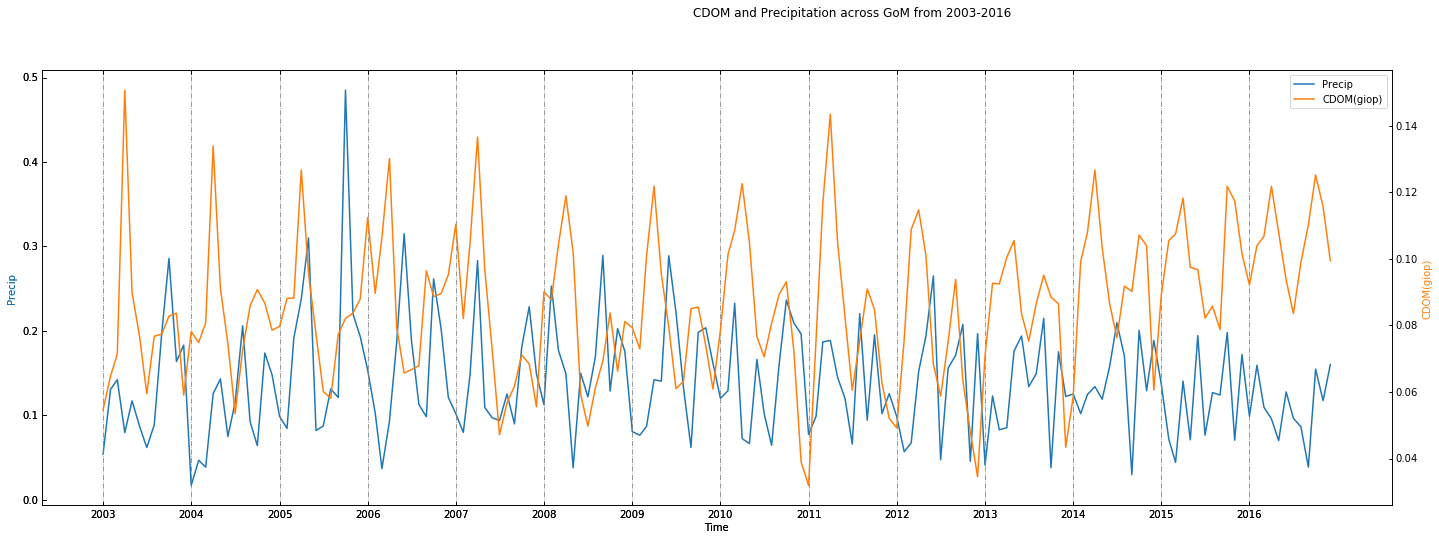

In [24]:
#import just the means
prcp_means = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_means.txt')
pm = np.loadtxt(prcp_means)
#print(pm.shape)

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(30,8))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
plt.suptitle('CDOM and Precipitation across GoM from 2003-2016',va='center',ha='center')
#plt.setp(par1,xticks = years)

par1 = host.twinx()

host.set_xlabel("Time")
host.set_ylabel("Precip")
par1.set_ylabel("CDOM(giop)")


p1, = host.plot(x, pm, label="Precip")
p2, = par1.plot(x, cdomgiop_avg, label="CDOM(giop)")


host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

par1.set_xticks(years)
par1.grid(axis='x',color='grey',linestyle='-.')

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/cdom_giop_precip_compare_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

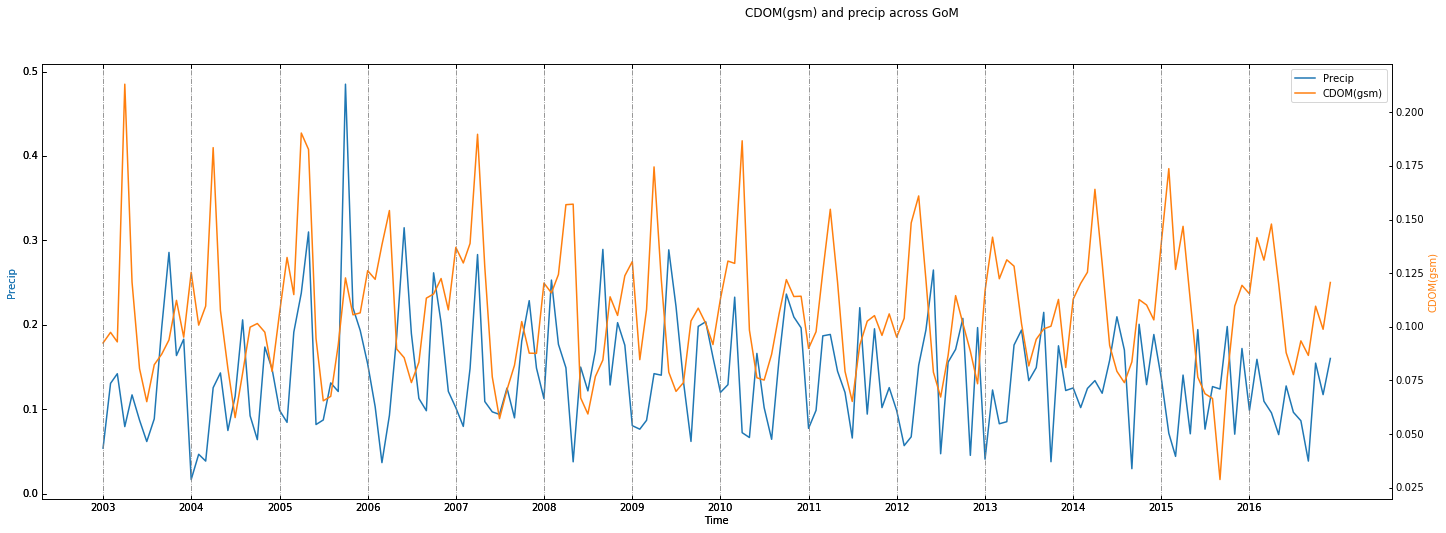

In [25]:
##GSM
#import just the means
prcp_means = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_means.txt')
pm = np.loadtxt(prcp_means)
#print(pm.shape)

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(30,8))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
plt.suptitle('CDOM(gsm) and precip across GoM')
par1 = host.twinx()

host.set_xlabel("Time")
host.set_ylabel("Precip")
par1.set_ylabel("CDOM(gsm)")

p1, = host.plot(x, pm, label="Precip")
p2, = par1.plot(x, cdomgsm_avg, label="CDOM(gsm)")


host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())


par1.set_xticks(years)
par1.grid(axis='x',color='grey',linestyle='-.')



#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/cdom_gsm_precip_compare_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

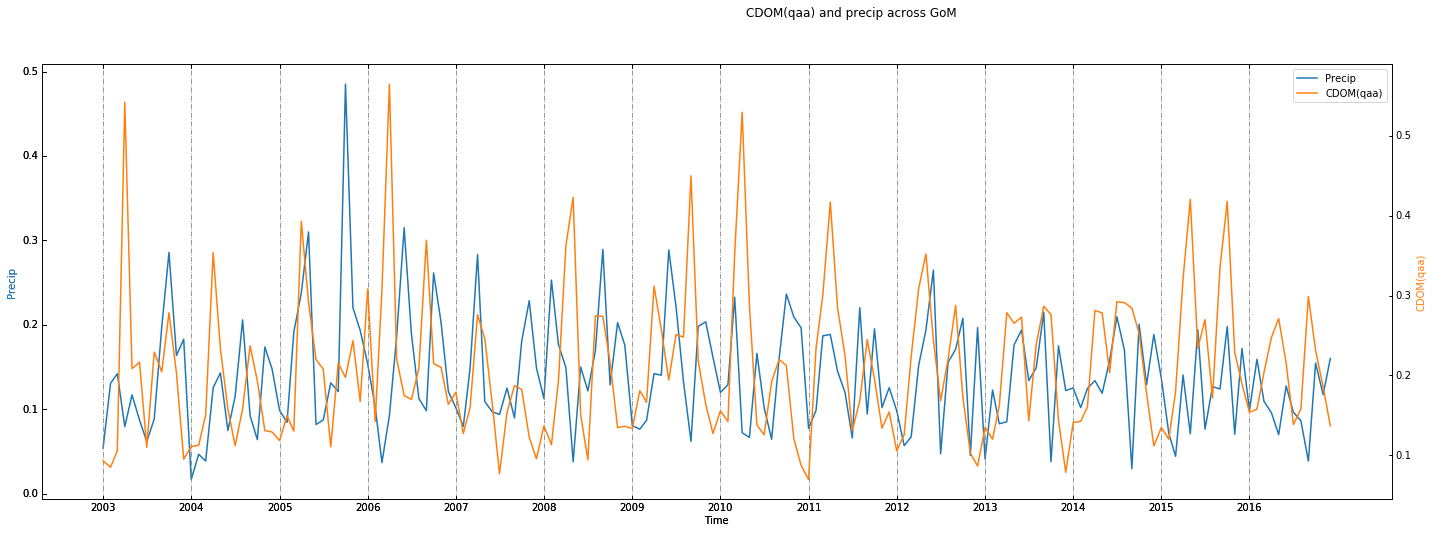

In [26]:
##QAA
#import just the means
prcp_means = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_means.txt')
pm = np.loadtxt(prcp_means)
#print(pm.shape)

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(30,8))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
plt.suptitle('CDOM(qaa) and precip across GoM')

par1 = host.twinx()

host.set_xlabel("Time")
host.set_ylabel("Precip")
par1.set_ylabel("CDOM(qaa)")

p1, = host.plot(x, pm, label="Precip")
p2, = par1.plot(x, cdomqaa_avg, label="CDOM(qaa)")


host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())


par1.set_xticks(years)
par1.grid(axis='x',color='grey',linestyle='-.')



#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/cdom_qaa_precip_compare_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

## Precip vs. CDOM scatter

In [27]:
d = {'A':x,'B':cdomgiop_avg}
dfgiop = pd.DataFrame(data=d)
#print(dfgiop)
yr = [None]*len(dfgiop['A'])
for i,y in enumerate(dfgiop['A']):  ##this section pulls out the year of each data point so that they can be grouped
    y = str(y)                       # by year and colored by year
    yy = y[:4]
    yr[i] = yy
dfgiop['A'] = yr
#print(dfgiop)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


LinregressResult(slope=-0.0023804705568947274, intercept=0.086449535256417007, rvalue=-0.0073937325325303793, pvalue=0.92421989113388769, stderr=0.024988095844885108)
-0.00238047055689


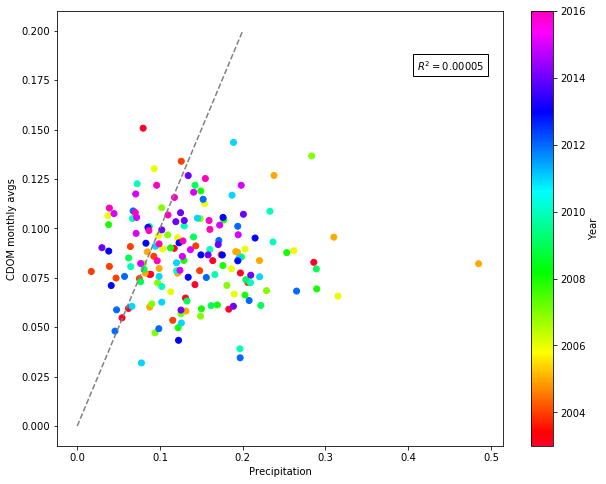

In [28]:
#import just the means
prcp_means = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_means.txt')
pm = np.loadtxt(prcp_means)
#print(pm)

xx = pm
y = dfgiop['B']
z = [0,0.2]     ##this is to plot the 1:1 line

fig, ax = plt.subplots(figsize= (10,8))
s = ax.scatter(xx,y,c=dfgiop['A'],cmap=plt.cm.gist_rainbow)
cb = plt.colorbar(s)
cb.set_label('Year')

ax.plot(z,z,color='grey',linestyle='--')
ax.set_xlabel("Precipitation")
ax.set_ylabel("CDOM monthly avgs")
ax.text(0.41,0.18,'$R^2 = 0.00005$',bbox=dict(edgecolor='black',fill=None))
fig.show()

#linear regression
import scipy
from scipy import stats
print(scipy.stats.linregress(pm,cdomgiop_avg))
#line of best fit
m,b = np.polyfit(xx,y,deg=1)
print(m)


#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/scatter/precip_cdom_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

## Variance over time

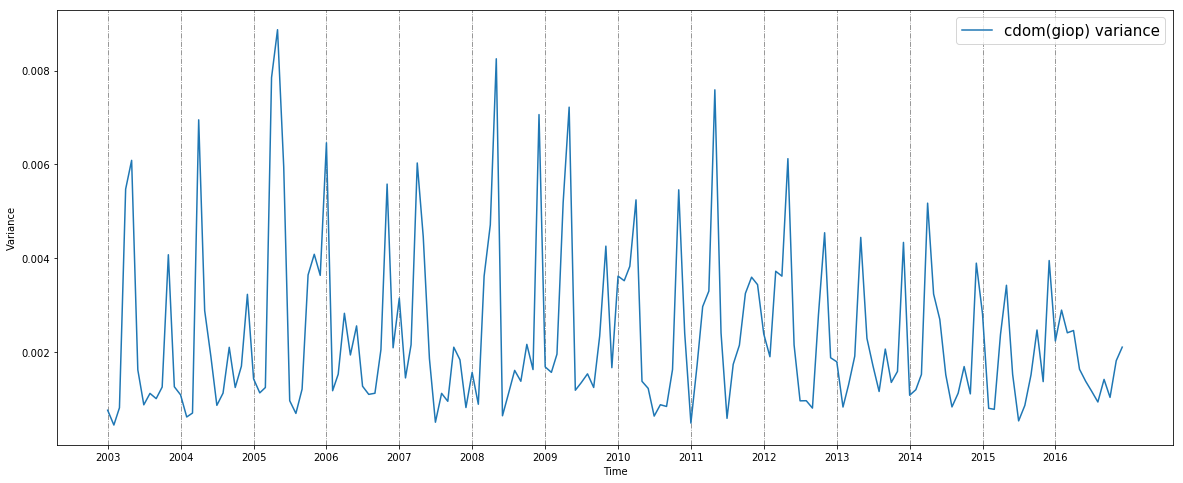

In [29]:
#GIOP
fig, ax = plt.subplots(figsize= (20,8))
plt.plot(x,cdomgiop_var)
plt.legend(['cdom(giop) variance'],prop={'size':15})
plt.xticks(years)
plt.grid(axis='x',color='grey',linestyle='-.')
ax.set_xlabel('Time')
ax.set_ylabel('Variance')
#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/cdomgiop_variance_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

In [30]:
#Kd490 Variance

#specify the directory where all the files are saved
kd490dir= '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/Kd490/subsets'

#list all the files in the directory using the os module
kd490_all=os.listdir(kd490dir)

wd = os.chdir(kd490dir)

##this loop calculates the average across the GoM for each month
#number of files
numfiles = len(kd490_all)
       
#looping through each file, doing as detailed in the above 
#section for subsetting data

kd490_avg = []
kd490_std = []
kd490_var = []
x = []
for yr in range(2003,2017):  
    fn = 'kd490_subset_data_'+ str(yr)
    
    for mn in range (1,13):
        fnm = fn + '_' + str(mn)
        #print (fnm) ##this gives all the files names
            
        #data = open(fnm,'r')
        data = np.loadtxt(fnm)
        #data = np.genfromtxt(fnm)
        #print (data)              ##here is where it goes to only the 12th month

        data_=np.array(data).astype(np.float)
        #print (data_)

        ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
        #print (ma)

        avg = np.nanmean(ma)
        #print (avg)
        std = np.nanstd (ma)
        #print (std) 
        var = np.nanvar (ma)

        kd490_avg += [avg]
        kd490_std += [std]
        kd490_var += [var]

        #this is creating the dates for the x axis of the time series
        time = str(mn) + '_' + str(yr)
        date = datetime.strptime(time, '%m_%Y')
        x.append(date)


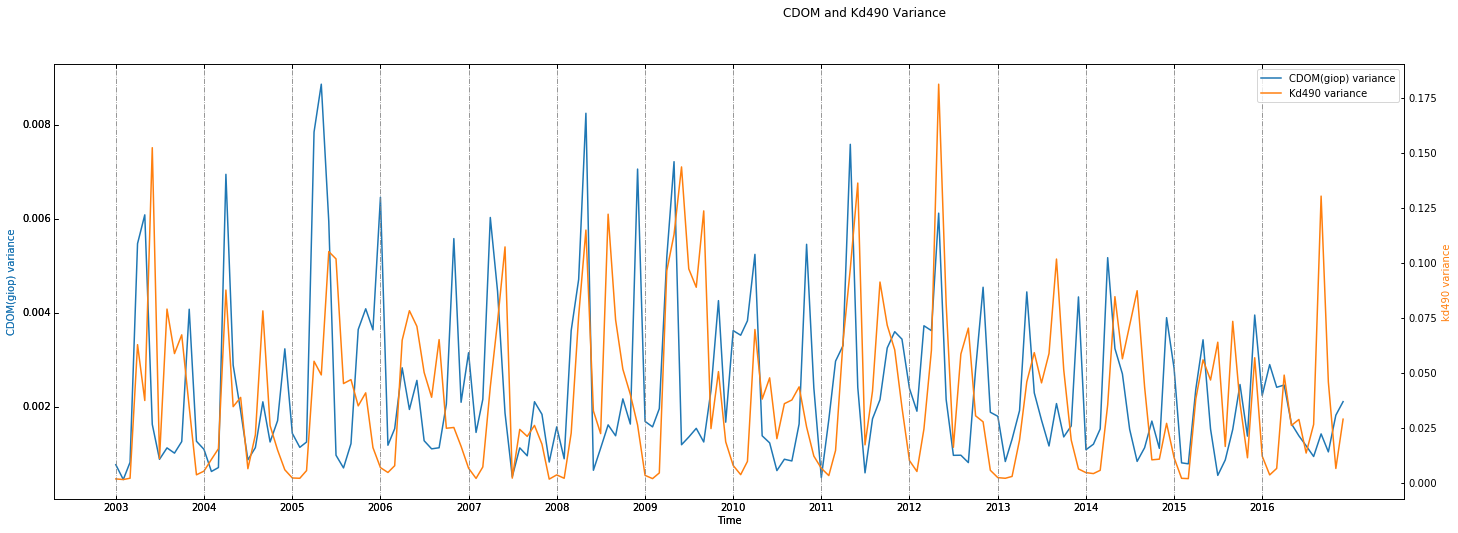

In [31]:
##plot the kd490 var and the cdom var together
##plotting kd490 w/ CDOM


from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(30,8))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
plt.suptitle('CDOM and Kd490 Variance')

par1 = host.twinx()


host.set_xlabel("Time")
host.set_ylabel("CDOM(giop) variance")
par1.set_ylabel("kd490 variance")


p1, = host.plot(x, cdomgiop_var, label="CDOM(giop) variance")
p2, = par1.plot(x, kd490_var, label="Kd490 variance")


host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

par1.set_xticks(years)
par1.grid(axis='x',color='grey',linestyle='-.')



#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/Kd490/timeseries/kd490var_CDOMvar_compare_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

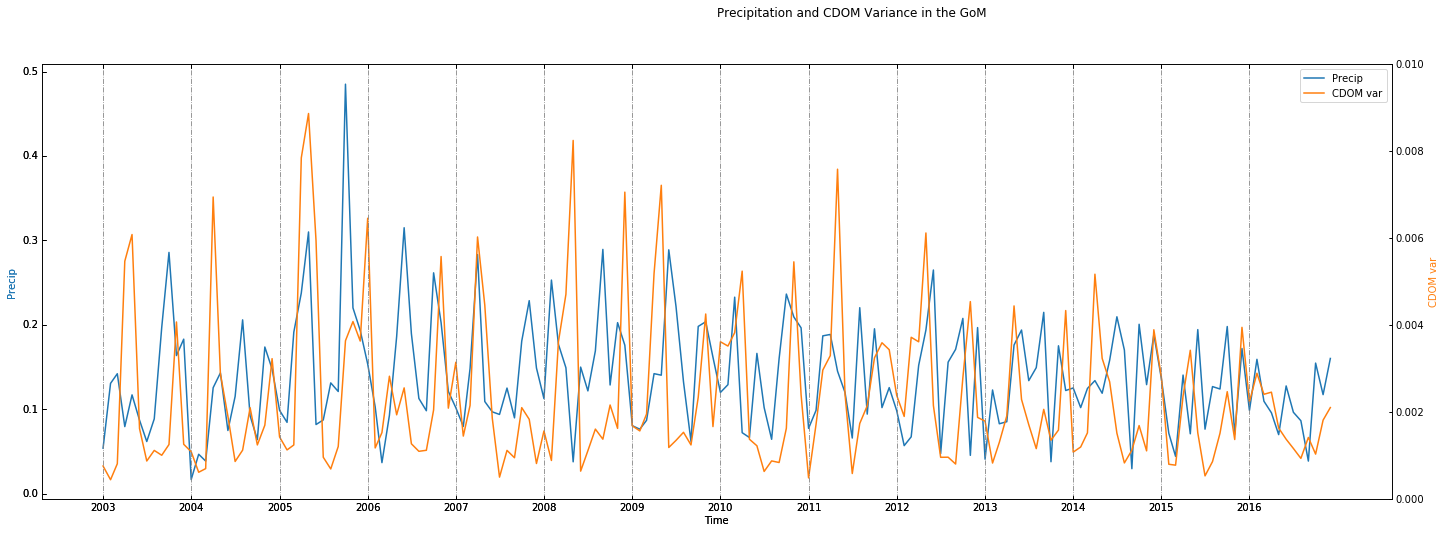

In [32]:
#import just the means
prcp_means = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_means.txt')
pm = np.loadtxt(prcp_means)

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(30,8))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
plt.suptitle('Precipitation and CDOM Variance in the GoM')

par1 = host.twinx()

host.set_xlabel("Time")
host.set_ylabel("Precip")
par1.set_ylabel("CDOM var")

p1, = host.plot(x, pm, label="Precip")
p2, = par1.plot(x, cdomgiop_var, label="CDOM var")


par1.set_ylim(0, 0.01)


host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

par1.set_xticks(years)
par1.grid(axis='x',color='grey',linestyle='-.')

plt.draw()


#save the file
filename1 ='/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/cdomvariance_precip_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

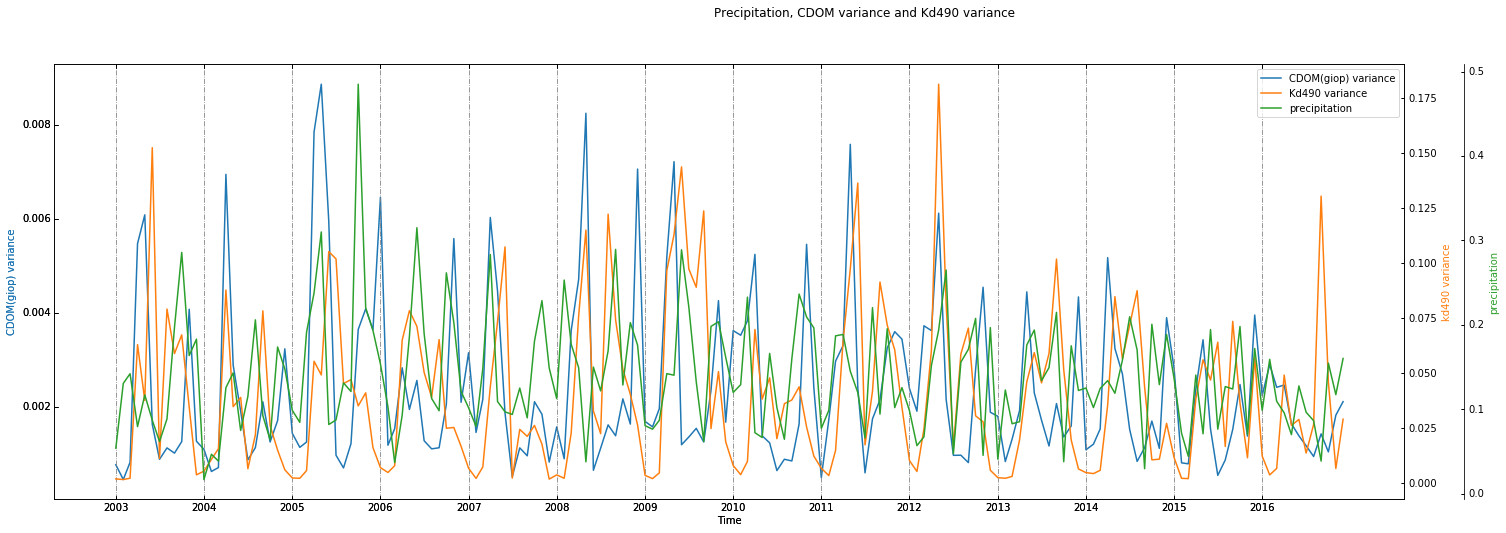

In [33]:
##plotting kd490 w/ CDOM

#import just the means
prcp_means = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_means.txt')
pm = np.loadtxt(prcp_means)

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(30,8))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
plt.suptitle('Precipitation, CDOM variance and Kd490 variance')

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlabel("Time")
host.set_ylabel("CDOM(giop) variance")
par1.set_ylabel("kd490 variance")
par2.set_ylabel("precipitation")

p1, = host.plot(x, cdomgiop_var, label="CDOM(giop) variance")
p2, = par1.plot(x, kd490_var, label="Kd490 variance")
p3, = par2.plot(x, pm, label="precipitation")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

par1.set_xticks(years)
par1.grid(axis='x',color='grey',linestyle='-.')

plt.draw()


#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/kd_cdom_climate/kd490var_CDOMvar_prcp_compare_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

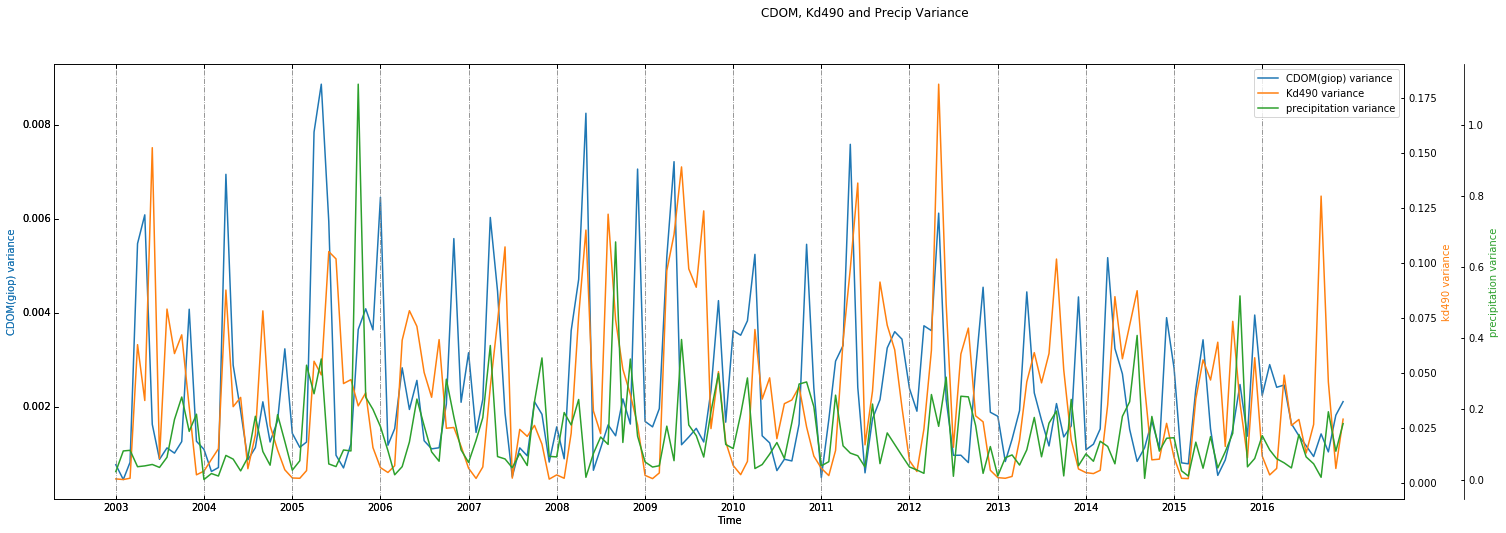

In [34]:
##plotting kd490 w/ CDOM

#import just the means
prcp_var = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_var.txt')
pv = np.loadtxt(prcp_var)

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(30,8))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
plt.suptitle('CDOM, Kd490 and Precip Variance')

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlabel("Time")
host.set_ylabel("CDOM(giop) variance")
par1.set_ylabel("kd490 variance")
par2.set_ylabel("precipitation variance")

p1, = host.plot(x, cdomgiop_var, label="CDOM(giop) variance")
p2, = par1.plot(x, kd490_var, label="Kd490 variance")
p3, = par2.plot(x, pv, label="precipitation variance")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

par1.set_xticks(years)
par1.grid(axis='x',color='grey',linestyle='-.')

plt.draw()


#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/kd_cdom_climate/kd490var_CDOMvar_prcpvar_compare_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

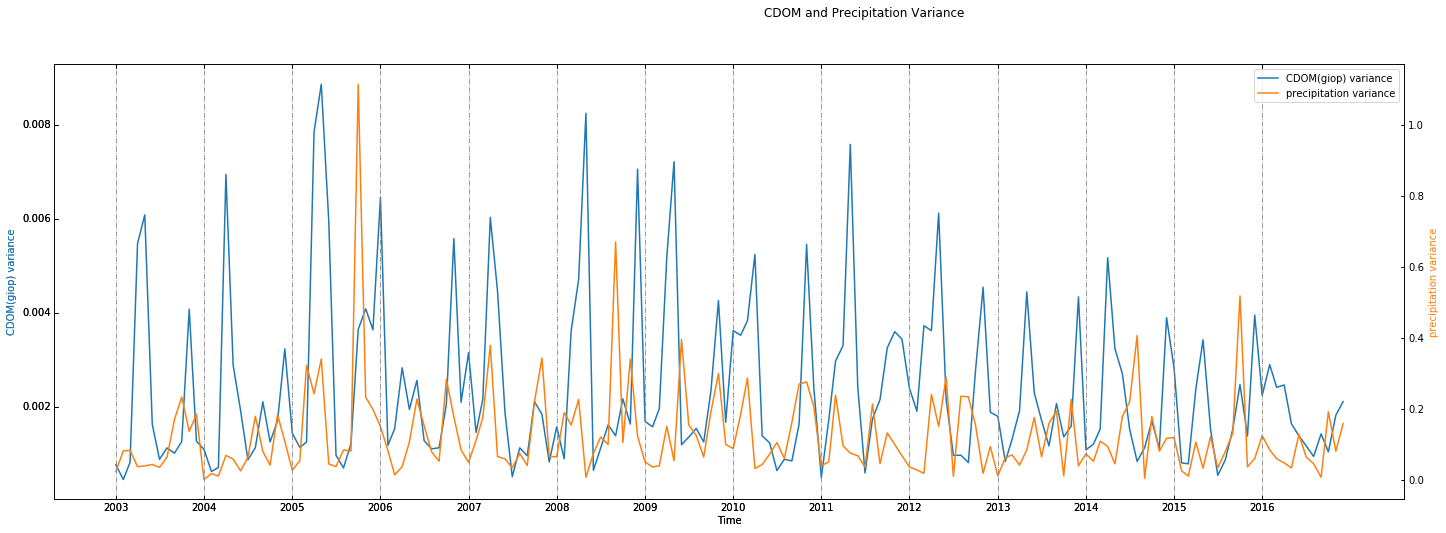

In [35]:
##plotting prcp variance w/ cdom variance

#import just the means
prcp_var = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_var.txt')
pv = np.loadtxt(prcp_var)

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(30,8))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)
plt.suptitle('CDOM and Precipitation Variance')

par1 = host.twinx()

host.set_xlabel("Time")
host.set_ylabel("CDOM(giop) variance")
par1.set_ylabel("precipitation variance")

p1, = host.plot(x, cdomgiop_var, label="CDOM(giop) variance")
p2, = par1.plot(x, pv, label="precipitation variance")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

par1.set_xticks(years)
par1.grid(axis='x',color='grey',linestyle='-.')

plt.draw()


#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/CDOMvar_prcpvar_compare_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

## scatter plots of cdom, kd and climate variables

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.0515178786086
0.00593153652332


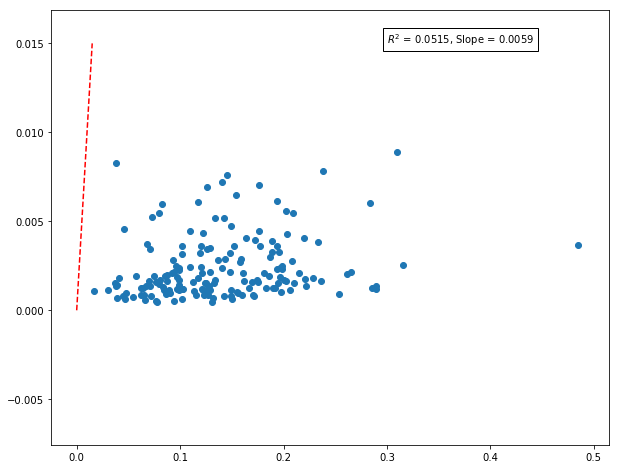

In [37]:
#import just the means
prcp_means = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_means.txt')
pm = np.loadtxt(prcp_means)
#print(pm)

x = pm
y = cdomgiop_var
z= [0,0.015]

fig, ax = plt.subplots(figsize= (10,8))
ax.scatter(x,y)
ax.plot(z,z,color='r',linestyle='--')
ax.set_xlabel=('precipitation')
ax.set_ylabel=('CDOM variance')
ax.text(0.3,0.015,'$R^2$ = 0.0515, Slope = 0.0059',bbox=dict(edgecolor='black',fill=None))
fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(pm,cdomgiop_var)
r_squared = r_value**2
print(r_squared)
print(slope)

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/scatter/precip_cdomvar_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.0163344965804
m= 0.00175660202082


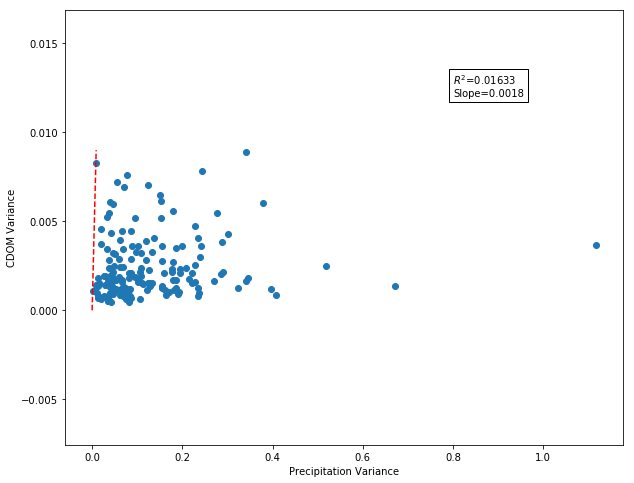

In [42]:
##scatter of prcp var vs. cdom var
#import just the variance
prcp_var = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_var.txt')
pv = np.loadtxt(prcp_var)
#print(pm)
##plot climate vs. variance?
x = pv
y = cdomgiop_var
z = [0,0.009]

fig, ax = plt.subplots(figsize= (10,8))
ax.scatter(x,y)
ax.plot(z,z,color='red',linestyle='--')
ax.set_xlabel('Precipitation Variance')
ax.set_ylabel('CDOM Variance')
ax.text(0.8,0.012,'$R^2$=0.01633\nSlope=0.0018',bbox=dict(edgecolor='black',fill=None))
fig.show()
#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err= scipy.stats.linregress(pv,cdomgiop_var)
r_squared = r_value**2
print('R^2=', r_squared)
print('m=', slope)


#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/scatter/precipvar_cdomvar_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

In [43]:
##trying out different correlation analysis
import scipy
from scipy import stats

#pearson correlation analysis on precip var and cdomgiop var
var_var = scipy.stats.pearsonr(pv,cdomgiop_var)
print(var_var)

#pearson correlation analysis on precip means and cdomgiop var
avg_var = scipy.stats.pearsonr(pm,cdomgiop_var)
print(avg_var)

(0.12780648097947073, 0.098744490151223441)
(0.22697550222136456, 0.0030895105623685425)


## Algorithm Scatterplots

#### comparing algorithm against themselves

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.522284660457
m= 0.988995726451


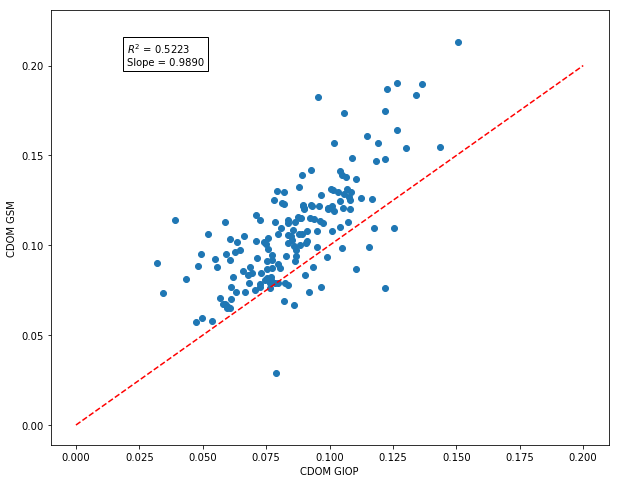

In [46]:
##giop vs gsm
x = cdomgiop_avg
y = cdomgsm_avg
x1 = str(cdomgiop_avg)
z = [0,0.2]

fig, ax = plt.subplots(figsize= (10,8))
ax.scatter(x,y)
ax.plot(z,z,color='r',linestyle='--')
ax.set_xlabel('CDOM GIOP')
ax.set_ylabel('CDOM GSM')
ax.text(0.02,0.2,'$R^2$ = 0.5223\nSlope = 0.9890',bbox=dict(edgecolor='black',fill=None))

fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=', slope)



#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/giop_gsm_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.435571974623
m= 2.79047972006


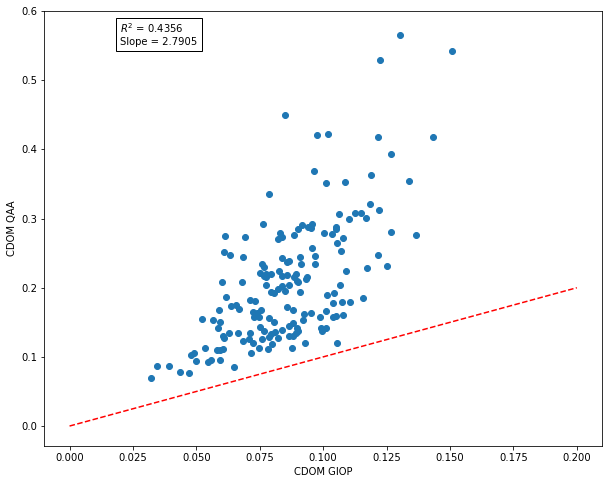

In [47]:
##giop vs qaa
x = cdomgiop_avg
y = cdomqaa_avg
z = [0,0.2]

fig, ax = plt.subplots(figsize= (10,8))
ax.scatter(x,y)
ax.plot(z,z,color='r',linestyle='--')
ax.set_xlabel('CDOM GIOP')
ax.set_ylabel('CDOM QAA')
ax.text(0.02,0.55,'$R^2$ = 0.4356\nSlope = 2.7905',bbox=dict(edgecolor='black',fill=None))

fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=',slope)


#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/giop_qaa_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.179159800304
m= 1.30776108961


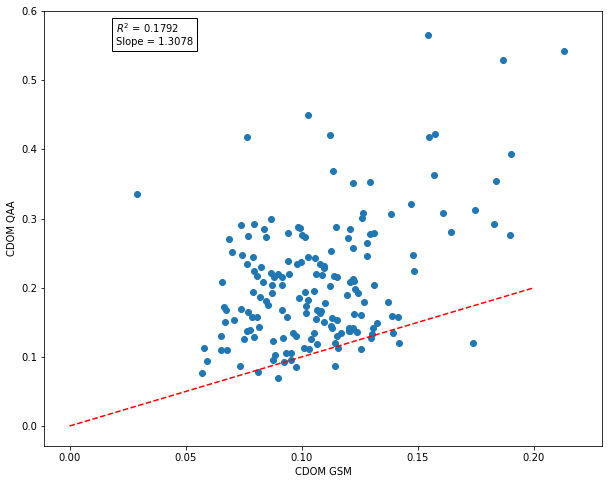

In [48]:
##gsm vs qaa
x = cdomgsm_avg
y = cdomqaa_avg
z = [0,0.2]

fig, ax = plt.subplots(figsize= (10,8))
ax.scatter(x,y)
ax.plot(z,z,color='r',linestyle='--')
ax.set_xlabel('CDOM GSM')
ax.set_ylabel('CDOM QAA')
ax.text(0.02,0.55,'$R^2$ = 0.1792\nSlope = 1.3078',bbox=dict(edgecolor='black',fill=None))

fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=',slope)


#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/gsm_qaa_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

## comparing algorithms with gnats

In [49]:
import scipy
from scipy import stats

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.00976379659191
m= -0.0416062059843


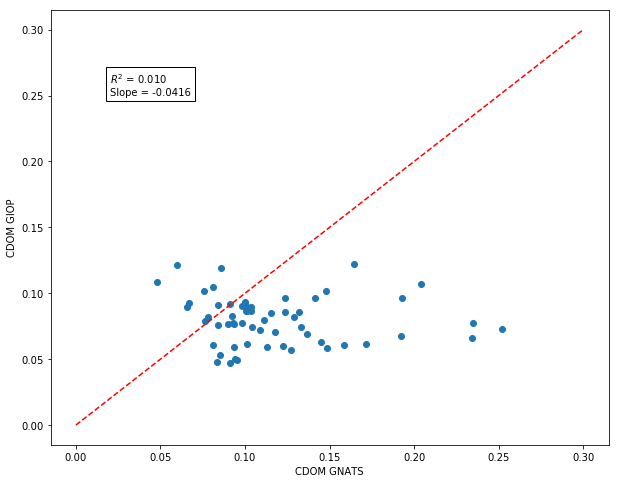

In [51]:
##giop vs gnats
x = gnats_avg['cdom']
y = cdomgiop_gnats['B']
z = [0, 0.3]

fig, ax = plt.subplots(figsize= (10,8))
ax.scatter(x,y)
ax.plot(z,z, color = 'red',linestyle = '--')
ax.set_xlabel('CDOM GNATS')
ax.set_ylabel('CDOM GIOP')
ax.text(0.02,0.25,'$R^2$ = 0.010\nSlope = -0.0416',bbox=dict(edgecolor='black',fill=None))
fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=',slope)

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/giop_gnats_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.000319349342941
m= 0.0110533657518


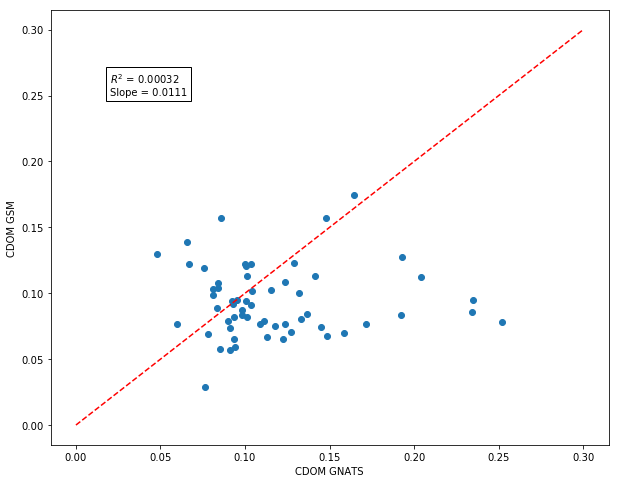

In [52]:
##GSM

x = gnats_avg['cdom']
y = cdomgsm_gnats['B']
z = [0,0.3]

fig, ax = plt.subplots(figsize= (10,8))
ax.scatter(x,y)
ax.plot(z,z, color = 'red',linestyle = '--')
ax.set_xlabel('CDOM GNATS')
ax.set_ylabel('CDOM GSM')
ax.text(0.02,0.25,'$R^2$ = 0.00032\nSlope = 0.0111',bbox=dict(edgecolor='black',fill=None))
fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=',slope)

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/gsm_gnats_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.000829827502917
m= 0.0567436284128


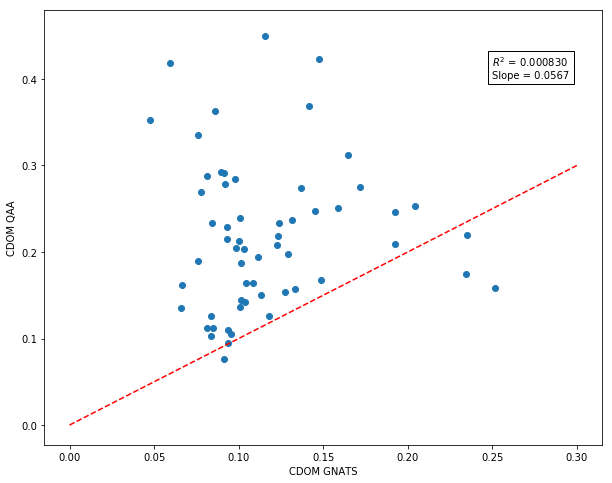

In [53]:
##qaa

x = gnats_avg['cdom']
y = cdomqaa_gnats['B']
z = [0,0.3]

fig, ax = plt.subplots(figsize= (10,8))
ax.scatter(x,y)
ax.plot(z,z,color='red',linestyle='--')
ax.set_xlabel('CDOM GNATS')
ax.set_ylabel('CDOM QAA')
ax.text(0.25,0.4,'$R^2$ = 0.000830\nSlope = 0.0567',bbox=dict(edgecolor='black',fill=None))
fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=',slope)

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/qaa_gnats_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

## Histograms

In [54]:
#numeric python module, useful for handling large data arrays
import numpy as np

import pandas as pd

#module for dealing with netCDF files (all sat files are netCDF)
import netCDF4 as nc

#modules for making plots. Here wer are importing the full matplotlib
#module, but also the sub-module pyplot separately with an abbreviated
#name so it is easier to use in the code
import matplotlib.pyplot as plt
import matplotlib

#panda
import pandas as pd


#import datetime
import datetime
from datetime import datetime

#for displaying the plots in this notebook 
%matplotlib inline

#module for making maps
from mpl_toolkits.basemap import Basemap

#miscellaneous operating system interfaces module for doing things like
#moving file, exploring directory paths, etc..
import os
import re


In [ ]:
#plot histogram of CDOM
fig2 = plt.hist(cdomgiop_avg)
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_monthlyavgb_hist'
plt.savefig(filename2+'.tif',dpi=300)
wd = os.chdir(cdom_giopdir)
cwd = os.getcwd()
print (cwd)

In [ ]:
#specify the directory where all the files are saved
cdom_giopdir= '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/giop'

#list all the files in the directory using the os module
cdom_giop_all=os.listdir(cdom_giopdir)
wd = os.chdir(cdom_giopdir)
cwd = os.getcwd()
#print (cwd)

#ok so we want a histogram per year
#separate out the data by year
#this loop separates the data by month
cdomgiop_2003 = []
cdomgiop_2004 = []
cdomgiop_2005 = []
cdomgiop_2006 = []
cdomgiop_2007 = []
cdomgiop_2008 = []
cdomgiop_2009 = []
cdomgiop_2010 = []
cdomgiop_2011 = []
cdomgiop_2012 = []
cdomgiop_2013 = []
cdomgiop_2014 = []
cdomgiop_2015 = []
cdomgiop_2016 = []
hist_x =[]
for yr in range(2003,2017):  
    fn = 'adg443.giop_subset_data_'+ str(yr)
    
    for mn in range (1,13):
        fnm = fn + '_' + str(mn)
        #print (fnm) ##this gives all the files names
        
        y2003 = re.search('_2003_',fnm)
        if y2003:
            cdomgiop_2003 += [fnm]
        elif not y2003:
            y2004 = re.search('_2004_',fnm)
            if y2004:
                cdomgiop_2004 += [fnm]
            elif not y2004:
                y2005 = re.search('_2005_',fnm)
                if y2005:
                    cdomgiop_2005 += [fnm]
                elif not y2005:
                    y2006 = re.search('_2006_',fnm)
                    if y2006:
                        cdomgiop_2006 += [fnm]
                    elif not y2006:
                        y2007 = re.search('_2007_',fnm)
                        if y2007:
                            cdomgiop_2007 += [fnm]
                        elif not y2007:
                            y2008 = re.search('_2008_',fnm)
                            if y2008:
                                cdomgiop_2008 += [fnm]
                            elif not y2008:
                                y2009 = re.search('_2009_',fnm)
                                if y2009:
                                    cdomgiop_2009 += [fnm]
                                elif not y2009:
                                    y2010 = re.search('_2010_',fnm)
                                    if y2010:
                                        cdomgiop_2010 += [fnm]
                                    elif not y2010:
                                        y2011 = re.search('_2011_',fnm)
                                        if y2011:
                                            cdomgiop_2011 += [fnm]
                                        elif not y2011:
                                            y2012 = re.search('_2012_',fnm)
                                            if y2012:
                                                cdomgiop_2012 += [fnm]
                                            elif not y2012:
                                                y2013 = re.search('_2013_',fnm)
                                                if y2013:
                                                    cdomgiop_2013 += [fnm]
                                                elif not y2013:
                                                    y2014 = re.search('_2014_',fnm)
                                                    if y2014:
                                                        cdomgiop_2014 += [fnm]
                                                    elif not y2014:
                                                        y2015 = re.search('_2015_',fnm)
                                                        if y2015:
                                                            cdomgiop_2015 += [fnm]
                                                        elif not y2015:
                                                            y2016 = re.search('_2016_',fnm)
                                                            if y2016:
                                                                cdomgiop_2016 += [fnm]

                                
                        


In [ ]:
##2003
numfiles = len(cdomgiop_2003)
avgs_2003 = []
all_2003 = []
for ii in range (0,numfiles):
    file = cdomgiop_2003[ii]
    data = np.loadtxt(file)     
    #print (data)              
    
    
    data_=np.array(data).astype(np.float)
    #print (data_)
    data_ = str(data_)
            
    #ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print(ma)
    #ma = str(ma)

    nan = 'nan'
    for i in data_:
        n = re.compile('(?<=0.)\w+')
        r = n.search(data_)
        if r:
            d = r.group(0)
            d = '0.' + d
            all_2003 += [d]

#print(all_2003)            
#all_2003 = ','.join(all_2003)
#all_2003 = float(all_2003)

#print(all_2003)
#plot histogram
#fig2 = plt.hist(avgs_2003)
fig,ax = plt.subplots()
ax.hist(all_2003)
ax.set_title(r'CDOM 2003')
plt.draw
#save figure
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2003avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

In [ ]:
##2004
numfiles = len(cdomgiop_2004)
avgs_2004 = []
for ii in range (0,numfiles):
    file = cdomgiop_2004[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    avgs_2004 += [avg] 
    
#print(avgs_2004) 

#plot histogram
#fig2 = plt.hist(avgs_2004)
fig,ax = plt.subplots()
ax.hist(avgs_2004)
ax.set_title(r'CDOM 2004')
plt.draw
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2004avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

In [ ]:
##2005
numfiles = len(cdomgiop_2005)
avgs_2005 = []
for ii in range (0,numfiles):
    file = cdomgiop_2005[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    avgs_2005 += [avg] 
    
#print(avgs_2005) 

#plot histogram
#fig2 = plt.hist(avgs_2005)
fig,ax = plt.subplots()
ax.hist(avgs_2005)
ax.set_title(r'CDOM 2005')
plt.draw
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2005avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

In [ ]:
##2006
numfiles = len(cdomgiop_2006)
avgs_2006 = []
for ii in range (0,numfiles):
    file = cdomgiop_2006[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    avgs_2006 += [avg] 
    
#print(avgs_2006) 

#plot histogram
#fig2 = plt.hist(avgs_2006)
fig,ax = plt.subplots()
ax.hist(avgs_2006)
ax.set_title(r'CDOM 2006')
plt.draw
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2006avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

In [ ]:
##2007
numfiles = len(cdomgiop_2007)
avgs_2007 = []
for ii in range (0,numfiles):
    file = cdomgiop_2007[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    avgs_2007 += [avg] 
    
#print(avgs_2007) 

#plot histogram
#fig2 = plt.hist(avgs_2007)
fig,ax = plt.subplots()
ax.hist(avgs_2007)
ax.set_title(r'CDOM 2007')
plt.draw
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2007avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

In [ ]:
##2008
numfiles = len(cdomgiop_2008)
avgs_2008 = []
for ii in range (0,numfiles):
    file = cdomgiop_2008[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    avgs_2008 += [avg] 
    
#print(avgs_2008) 

#plot histogram
#fig2 = plt.hist(avgs_2008)
fig,ax = plt.subplots()
ax.hist(avgs_2008)
ax.set_title(r'CDOM 2008')
plt.draw
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2008avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

In [ ]:
##2009
numfiles = len(cdomgiop_2009)
avgs_2009 = []
for ii in range (0,numfiles):
    file = cdomgiop_2009[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    avgs_2009 += [avg] 
    
#print(avgs_2009) 

#plot histogram
#fig2 = plt.hist(avgs_2009)
fig,ax = plt.subplots()
ax.hist(avgs_2009)
ax.set_title(r'CDOM 2009')
plt.draw
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2009avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

In [ ]:
##2010
numfiles = len(cdomgiop_2010)
avgs_2010 = []
for ii in range (0,numfiles):
    file = cdomgiop_2010[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    avgs_2010 += [avg] 
    
#print(avgs_2010) 

#plot histogram
#fig2 = plt.hist(avgs_2010)
fig,ax = plt.subplots()
ax.hist(avgs_2010)
ax.set_title(r'CDOM 2010')
plt.draw
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2010avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

In [ ]:
##2011
numfiles = len(cdomgiop_2011)
avgs_2011 = []
for ii in range (0,numfiles):
    file = cdomgiop_2011[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    avgs_2011 += [avg] 
    
#print(avgs_2011) 

#plot histogram
#fig2 = plt.hist(avgs_2011)
fig,ax = plt.subplots()
ax.hist(avgs_2011)
ax.set_title(r'CDOM 2011')
plt.draw
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2011avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

In [ ]:
##2012
numfiles = len(cdomgiop_2012)
avgs_2012 = []
for ii in range (0,numfiles):
    file = cdomgiop_2012[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    avgs_2012 += [avg] 
    
#print(avgs_2012) 

#plot histogram
#fig2 = plt.hist(avgs_2012)
fig,ax = plt.subplots()
ax.hist(avgs_2012)
ax.set_title(r'CDOM 2012')
plt.draw
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2012avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

In [ ]:
##2013
numfiles = len(cdomgiop_2013)
avgs_2013 = []
for ii in range (0,numfiles):
    file = cdomgiop_2013[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    avgs_2013 += [avg] 
    
#print(avgs_2013) 

#plot histogram
#fig2 = plt.hist(avgs_2013)
fig,ax = plt.subplots()
ax.hist(avgs_2013)
ax.set_title(r'CDOM 2013')
plt.draw
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2013avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

In [ ]:
##2014
numfiles = len(cdomgiop_2014)
avgs_2014 = []
for ii in range (0,numfiles):
    file = cdomgiop_2014[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    avgs_2014 += [avg] 
    
#print(avgs_2014) 

#plot histogram
#fig2 = plt.hist(avgs_2014)
fig,ax = plt.subplots()
ax.hist(avgs_2014)
ax.set_title(r'CDOM 2014')
plt.draw
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2014avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

In [ ]:
##2015
numfiles = len(cdomgiop_2015)
avgs_2015 = []
for ii in range (0,numfiles):
    file = cdomgiop_2015[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    avgs_2015 += [avg] 
    
#print(avgs_2015) 

#plot histogram
#fig2 = plt.hist(avgs_2015)
fig,ax = plt.subplots()
ax.hist(avgs_2015)
ax.set_title(r'CDOM 2015')
plt.draw
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2015avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

In [ ]:
##2016
numfiles = len(cdomgiop_2016)
avgs_2016 = []
for ii in range (0,numfiles):
    file = cdomgiop_2016[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    avgs_2016 += [avg] 
    
#print(avgs_2016) 

#plot histogram
#fig2 = plt.hist(avgs_2016)
fig,ax = plt.subplots()
ax.hist(avgs_2016)
ax.set_title(r'CDOM 2016')
plt.draw
filename2 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/histograms/cdomgiop_2016avgs_hist'
plt.savefig(filename2+'.tif',dpi=300)

## Monthly Anomaly Plots (+box plots)
This code puts together the monthly averages by month and then calculates the average for the month across all years. It then substracts the monthly average for each year from the overall average to calculate the monthly anomaly. 

Since this code calculates the average for each month it was also used to create box plots that were later combined into one large plot of each month together.

This section also calculates the averages and standard devs for each month so that they can later be put together to plot 1 year to look more at  seasonal cycle

In [55]:
#numeric python module, useful for handling large data arrays
import numpy as np

import pandas as pd

#module for dealing with netCDF files (all sat files are netCDF)
import netCDF4 as nc

#modules for making plots. Here wer are importing the full matplotlib
#module, but also the sub-module pyplot separately with an abbreviated
#name so it is easier to use in the code
import matplotlib.pyplot as plt
import matplotlib

#panda
import pandas as pd


#import datetime
import datetime
from datetime import datetime

#for displaying the plots in this notebook 
%matplotlib inline

#module for making maps
from mpl_toolkits.basemap import Basemap

#miscellaneous operating system interfaces module for doing things like
#moving file, exploring directory paths, etc..
import os
import re


In [56]:
#specify the directory where all the files are saved
cdom_giopdir= '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/giop'

#list all the files in the directory using the os module
cdom_giop_all=os.listdir(cdom_giopdir)



In [57]:
wd = os.chdir(cdom_giopdir)
cwd = os.getcwd()
print (cwd)

/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/giop


In [61]:
#this loop separates the data by month
cdomgiop_jan = []
cdomgiop_feb = []
cdomgiop_mar = []
cdomgiop_apr = []
cdomgiop_may = []
cdomgiop_jun = []
cdomgiop_jul = []
cdomgiop_aug = []
cdomgiop_sep = []
cdomgiop_oct = []
cdomgiop_nov = []
cdomgiop_dec = []
x =[]
for yr in range(2003,2017):  
    fn = 'adg443.giop_subset_data_'+ str(yr)
    
    for mn in range (1,13):
        fnm = fn + '_' + str(mn)
        #print (fnm) ##this gives all the files names
        
        octob = re.search('_10',fnm)
        if octob:
            cdomgiop_oct += [fnm]
        elif not octob:
            nov = re.search('_11',fnm)
            if nov:
                 cdomgiop_nov += [fnm]
            elif not nov:
                dec = re.search('_12',fnm)
                if dec:
                    cdomgiop_dec += [fnm]
                elif not dec:
                    jan = re.search(str(yr)+ '_1'+'',fnm)
                    if jan:
                        cdomgiop_jan += [fnm]
                    elif not jan:
                        feb = re.search(str(yr)+'_2',fnm)
                        if feb:
                            cdomgiop_feb += [fnm]
                        elif not feb:
                            mar = re.search('_3',fnm)
                            if mar:
                                cdomgiop_mar += [fnm]
                            elif not mar:
                                apr= re.search('_4',fnm)
                                if apr:
                                    cdomgiop_apr += [fnm]
                                elif not apr:
                                    may = re.search('_5',fnm)
                                    if may:
                                        cdomgiop_may += [fnm]
                                    elif not may:
                                        jun = re.search('_6',fnm)
                                        if jun:
                                            cdomgiop_jun += [fnm]
                                        elif not jun:
                                            jul = re.search('_7',fnm)
                                            if jul:
                                                cdomgiop_jul += [fnm]
                                            elif not jul:
                                                aug = re.search('_8',fnm)
                                                if aug:
                                                    cdomgiop_aug += [fnm]
                                                elif not aug:
                                                    sep = re.search('_9',fnm)
                                                    if sep:
                                                        cdomgiop_sep += [fnm]
                                                  
                

#### JANUARY

In [62]:
#calculates individual averages
numfiles = len(cdomgiop_jan)
cdomgiop_jan_avg = []
x = []
for ii in range (0,numfiles):
    file = cdomgiop_jan[ii]
    data = np.loadtxt(file)     
    #print (data)              

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    cdomgiop_jan_avg += [avg]
    #print(cdomgiop_jan_avg)

    #this is creating the dates for the x axis of the time series
    n = re.compile('(?<=data_)\w+')
    r = n.search(file)
    if r:
        d = r.group(0)
    date = datetime.strptime(d, '%Y_%m')
    x.append(date)


In [63]:
#calculate the average for all the januarys
jan_all = []
for i in cdomgiop_jan:
    a=np.array(np.loadtxt(i,dtype=float))
    jan_all.append(a)
jan_all = np.array(jan_all).astype(np.float)

data_=np.array(jan_all).astype(np.float)
print(data_.shape)
ma = np.ma.MaskedArray(jan_all,mask=np.isnan(data_))


jan_avg = np.nanmean(ma)
jan_std = np.nanstd(ma)
#print(jan_avg)



(14, 78, 156)


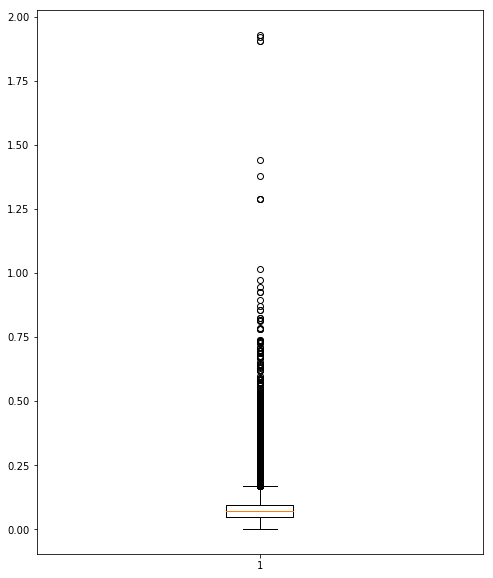

In [64]:
##reshaping the data
data = np.ravel(ma)
import numbers
jan_data = [x for x in data if isinstance (x,numbers.Number)]
#print(data)

fig = plt.figure
fig,ax = plt.subplots(figsize=(8,10))

ax.boxplot(jan_data)

plt.draw()

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/boxplots/boxplot_jan'
plt.savefig(filename1 + '.tif',dpi=300)


In [65]:
#calculate the anomalies
anom = [] ##will append all anomalies here
j = cdomgiop_jan_avg
j[:]=[x-jan_avg for x in j]
#print (j)
#x = str(x)
#j = str(j)

##this data frame is of all the monthly anomalies, 
#as the anomalies for each month are calculated below they will be added to this dataframe
#the dataframe will be used to create a plot of all the anomlaies together 
d = {'B':j,'A':x}
df = pd.DataFrame(data=d)
print(df)

            A         B
0  2003-01-01 -0.022500
1  2004-01-01  0.000933
2  2005-01-01  0.002468
3  2006-01-01  0.035224
4  2007-01-01  0.033169
5  2008-01-01  0.012866
6  2009-01-01  0.002094
7  2010-01-01  0.001323
8  2011-01-01 -0.045334
9  2012-01-01 -0.028009
10 2013-01-01 -0.006187
11 2014-01-01 -0.018579
12 2015-01-01  0.011954
13 2016-01-01  0.014913


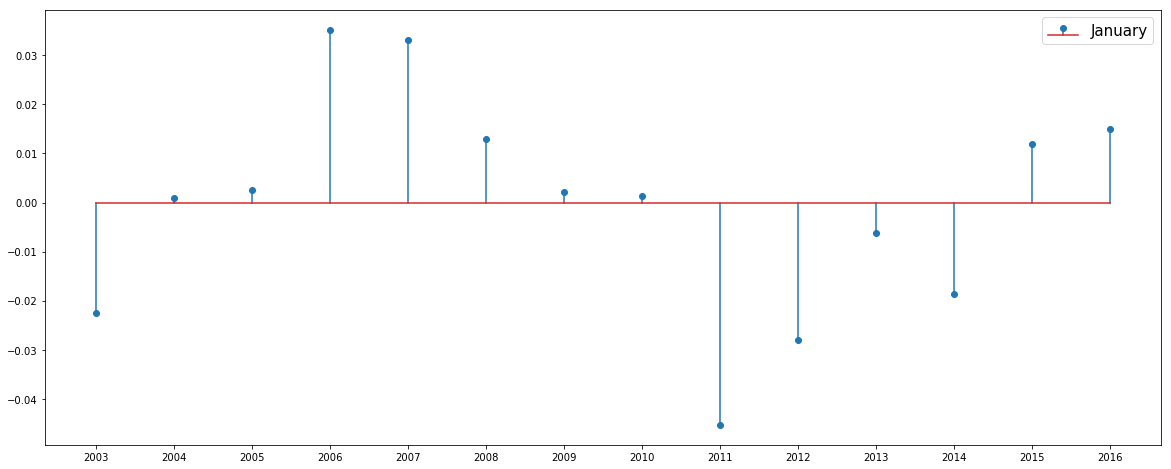

In [66]:
##plotting january averages
fig,ax = plt.subplots(figsize=(20,8)) 
plt.stem(x,j)
plt.xticks(years)
plt.legend(['January'],prop={'size':15})

#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_jan_anom'
plt.savefig(filename +'.tif',dpi=300)

#### FEBRUARY

In [67]:
#calculates individual averages
numfiles = len(cdomgiop_feb)
cdomgiop_feb_avg = []
x = []
for ii in range (0,numfiles):
    file = cdomgiop_feb[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    cdomgiop_feb_avg += [avg]
    #print(cdomgiop_feb_avg)#calculates individual averages
    
    #this is creating the dates for the x axis of the time series
    n = re.compile('(?<=data_)\w+')
    r = n.search(file)
    if r:
        d = r.group(0)
    date = datetime.strptime(d, '%Y_%m')
    x.append(date)

In [68]:
#calculate the average for all the februarys
feb_all = []
for i in cdomgiop_feb:
    a=np.array(np.loadtxt(i,dtype=float))
    feb_all.append(a)
feb_all = np.array(feb_all).astype(np.float)

ma = np.ma.MaskedArray(feb_all,mask=np.isnan(feb_all))
    #print (ma)

feb_avg = np.nanmean(ma)
feb_std = np.nanstd(ma)
#print(feb_avg)

#calculate the anomalies
f = cdomgiop_feb_avg
f[:]=[x-feb_avg for x in f]
#print (f)
d2 = {'A':x,'B':f}
df2 = pd.DataFrame(data=d2)
df = df.append(df2)
#print(df)

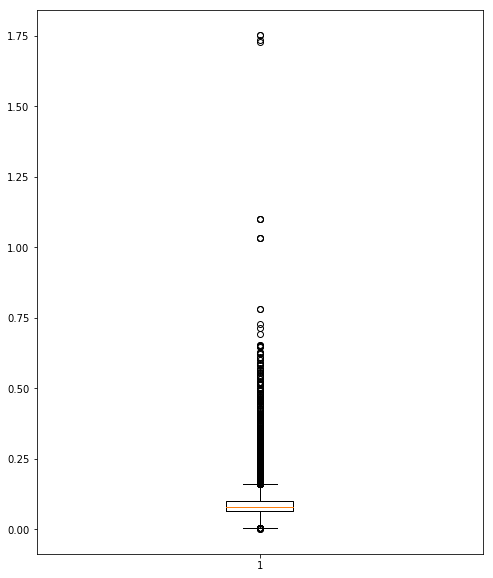

In [69]:
##reshaping the data
data = np.ravel(ma)
import numbers
feb_data = [x for x in data if isinstance (x,numbers.Number)]
#print(data)

fig = plt.figure
fig,ax = plt.subplots(figsize=(8,10))

ax.boxplot(feb_data)


#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/boxplots/boxplot_feb'
plt.savefig(filename1 + '.tif',dpi=300)

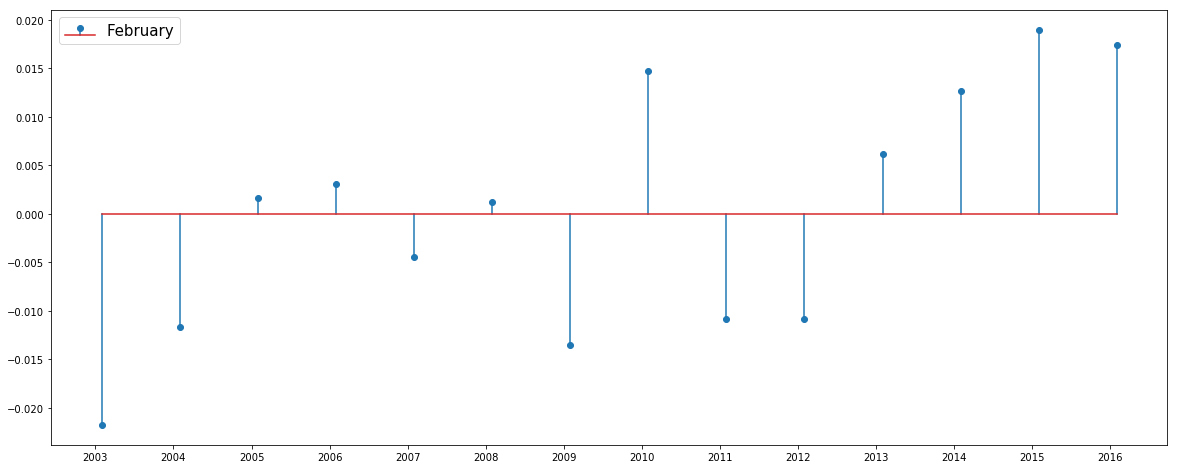

In [70]:
##plotting february averages
fig,ax = plt.subplots(figsize=(20,8)) 
plt.stem(x,f)
plt.legend(['February'],prop={'size':15})
plt.xticks(years)
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_feb_anom'
plt.savefig(filename +'.tif',dpi=300)

#### MARCH

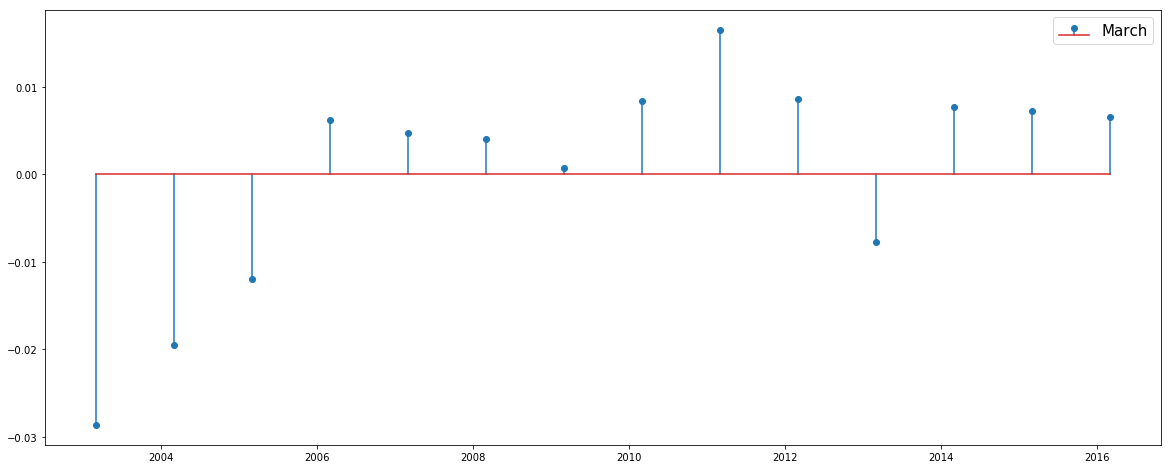

In [71]:
numfiles = len(cdomgiop_mar)
cdomgiop_mar_avg = []
x = []
for ii in range (0,numfiles):
    file = cdomgiop_mar[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    cdomgiop_mar_avg += [avg]
    #print(cdomgiop_mar_avg)
    
    #this is creating the dates for the x axis of the time series
    n = re.compile('(?<=data_)\w+')
    r = n.search(file)
    if r:
        d = r.group(0)
    date = datetime.strptime(d, '%Y_%m')
    x.append(date)
    
    
#calculate the average for all the marches
mar_all = []
for i in cdomgiop_mar:
    a=np.array(np.loadtxt(i,dtype=float))
    mar_all.append(a)
mar_all = np.array(mar_all).astype(np.float)

ma = np.ma.MaskedArray(mar_all,mask=np.isnan(mar_all))
    #print (ma)

mar_avg = np.nanmean(ma)
mar_std = np.nanstd(ma)
#print(feb_avg)

#calculate the anomalies
z = cdomgiop_mar_avg
z[:]=[x-mar_avg for x in z]
#print ()
d2 = {'A':x,'B':z}
df2 = pd.DataFrame(data=d2)
df = df.append(df2)
#print(df)

##plotting february averages
fig = plt.figure(figsize=(20,8)) 
plt.stem(x,z)
plt.legend(['March'],prop={'size':15})
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_mar_anom'
plt.savefig(filename +'.tif',dpi=300)

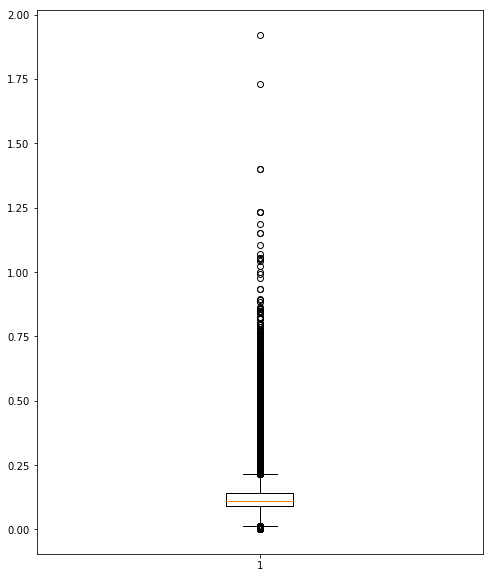

In [74]:
##reshaping the data
data = np.ravel(ma)
import numbers
mar_data = [x for x in data if isinstance (x,numbers.Number)]
#print(data)

fig = plt.figure
fig,ax = plt.subplots(figsize=(8,10))

ax.boxplot(mar_data)
plt.draw()

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/boxplots/boxplot_mar'
plt.savefig(filename1 + '.tif',dpi=300)

#### APRIL

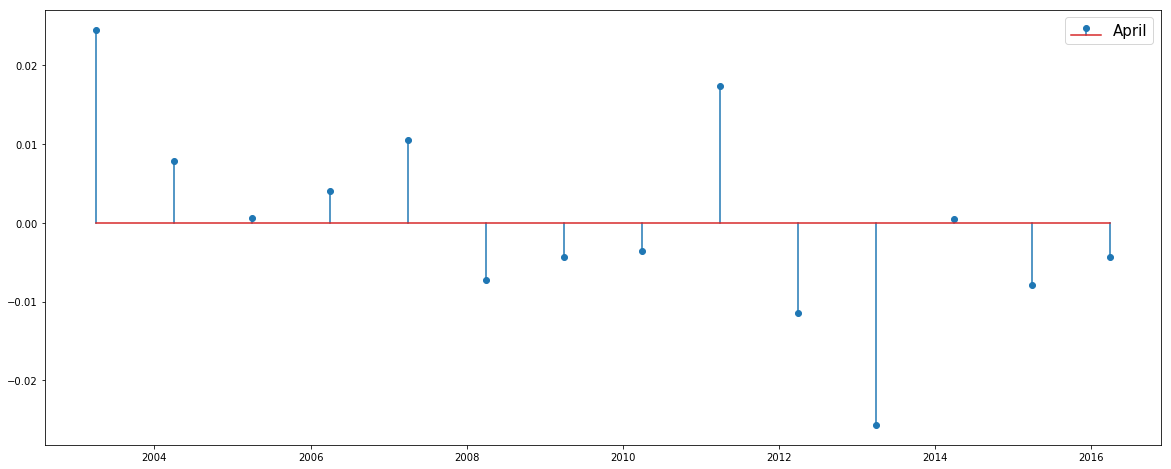

In [73]:
numfiles = len(cdomgiop_apr)
cdomgiop_apr_avg = []
x = []
for ii in range (0,numfiles):
    file = cdomgiop_apr[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    cdomgiop_apr_avg += [avg]
    #print(cdomgiop_apr_avg)
    
    #this is creating the dates for the x axis of the time series
    n = re.compile('(?<=data_)\w+')
    r = n.search(file)
    if r:
        d = r.group(0)
    date = datetime.strptime(d, '%Y_%m')
    x.append(date)
    
    
#calculate the average for all the aprches
apr_all = []
for i in cdomgiop_apr:
    a=np.array(np.loadtxt(i,dtype=float))
    apr_all.append(a)
apr_all = np.array(apr_all).astype(np.float)

ma = np.ma.MaskedArray(apr_all,mask=np.isnan(apr_all))
    #print (ma)

apr_avg = np.nanmean(ma)
apr_std = np.nanstd(ma)
#print(feb_avg)

#calculate the anomalies
m = cdomgiop_apr_avg
m[:]=[x-apr_avg for x in m]

d2 = {'A':x,'B':m}
df2 = pd.DataFrame(data=d2)
df = df.append(df2)
#print(df)

##plotting february averages
fig = plt.figure(figsize=(20,8)) 
plt.stem(x,m)
plt.legend(['April'],prop={'size':15})
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_apr_anom'
plt.savefig(filename +'.tif',dpi=300)

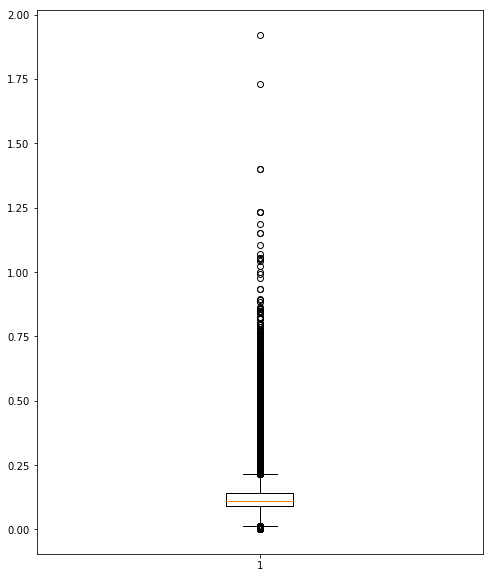

In [75]:
##reshaping the data
data = np.ravel(ma)
import numbers
apr_data = [x for x in data if isinstance (x,numbers.Number)]
#print(data)

fig = plt.figure
fig,ax = plt.subplots(figsize=(8,10))

ax.boxplot(apr_data)
plt.draw()

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/boxplots/boxplot_apr'
plt.savefig(filename1 + '.tif',dpi=300)

#### MAY

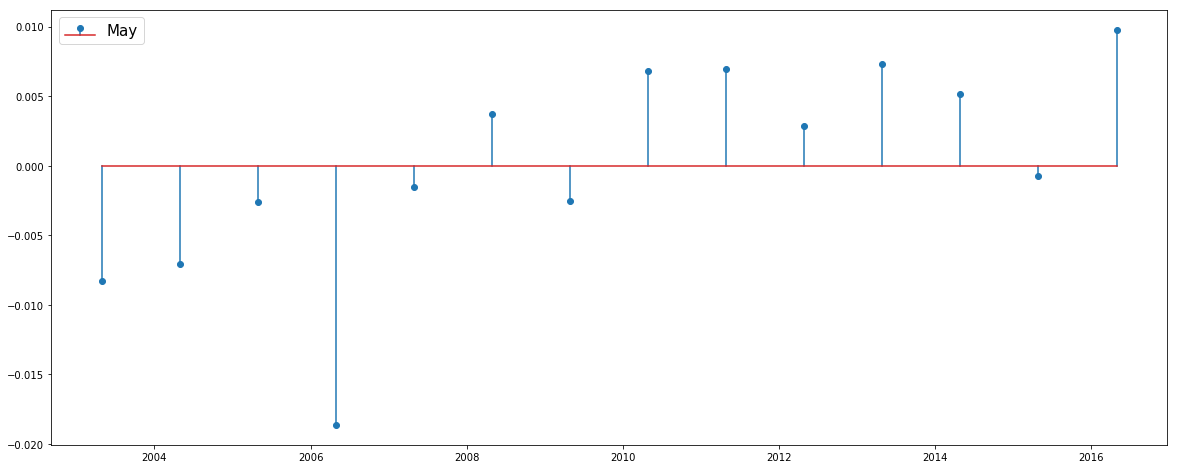

In [76]:
numfiles = len(cdomgiop_may)
cdomgiop_may_avg = []
x = []
for ii in range (0,numfiles):
    file = cdomgiop_may[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    cdomgiop_may_avg += [avg]
    #print(cdomgiop_may_avg)
    
    #this is creating the dates for the x axis of the time series
    n = re.compile('(?<=data_)\w+')
    r = n.search(file)
    if r:
        d = r.group(0)
    date = datetime.strptime(d, '%Y_%m')
    x.append(date)
    
    
#calculate the average for all the mayches
may_all = []
for i in cdomgiop_may:
    a=np.array(np.loadtxt(i,dtype=float))
    may_all.append(a)
may_all = np.array(may_all).astype(np.float)

ma = np.ma.MaskedArray(may_all,mask=np.isnan(may_all))
    #print (ma)

may_avg = np.nanmean(ma)
may_std = np.nanstd(ma)
#print(may_avg)

#calculate the anomalies
z = cdomgiop_may_avg
z[:]=[x-may_avg for x in z]
#print (z)
d2 = {'A':x,'B':z}
df2 = pd.DataFrame(data=d2)
df = df.append(df2)
#print(df)

##plotting may averages
fig = plt.figure(figsize=(20,8)) 
plt.stem(x,z)
plt.legend(['May'],prop={'size':15})
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_may_anom'
plt.savefig(filename +'.tif',dpi=300)

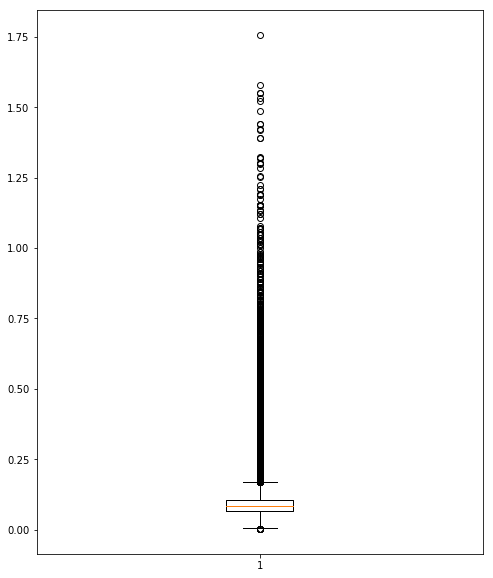

In [77]:
##reshaping the data
data = np.ravel(ma)
import numbers
may_data = [x for x in data if isinstance (x,numbers.Number)]
#print(data)

fig = plt.figure
fig,ax = plt.subplots(figsize=(8,10))

ax.boxplot(may_data)
plt.draw()

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/boxplots/boxplot_may'
plt.savefig(filename1 + '.tif',dpi=300)

#### JUNE

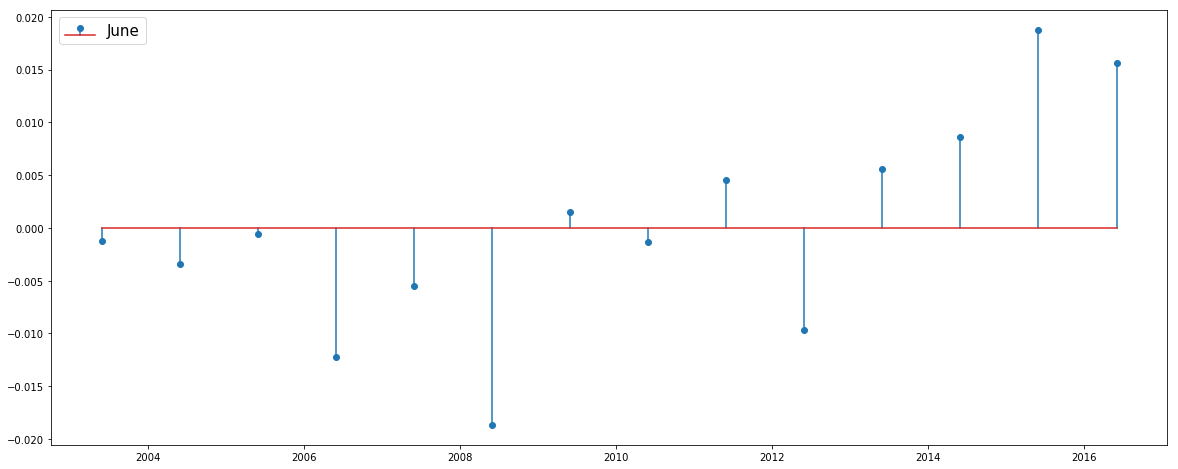

In [78]:
numfiles = len(cdomgiop_jun)
cdomgiop_jun_avg = []
x = []
for ii in range (0,numfiles):
    file = cdomgiop_jun[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    cdomgiop_jun_avg += [avg]
    #print(cdomgiop_jun_avg)
    
    #this is creating the dates for the x axis of the time series
    n = re.compile('(?<=data_)\w+')
    r = n.search(file)
    if r:
        d = r.group(0)
    date = datetime.strptime(d, '%Y_%m')
    x.append(date)
    
    
#calculate the average for all years
jun_all = []
for i in cdomgiop_jun:
    a=np.array(np.loadtxt(i,dtype=float))
    jun_all.append(a)
jun_all = np.array(jun_all).astype(np.float)

ma = np.ma.MaskedArray(jun_all,mask=np.isnan(jun_all))
    #print (ma)

jun_avg = np.nanmean(ma)
jun_std = np.nanstd(ma)
#print(jun_avg)

#calculate the anomalies
z = cdomgiop_jun_avg
z[:]=[x-jun_avg for x in z]
#print (z)
d2 = {'A':x,'B':z}
df2 = pd.DataFrame(data=d2)
df = df.append(df2)
#print(df)

##plotting jun averages
fig = plt.figure(figsize=(20,8)) 
plt.stem(x,z)
plt.legend(['June'],prop={'size':15})
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_jun_anom'
plt.savefig(filename +'.tif',dpi=300)

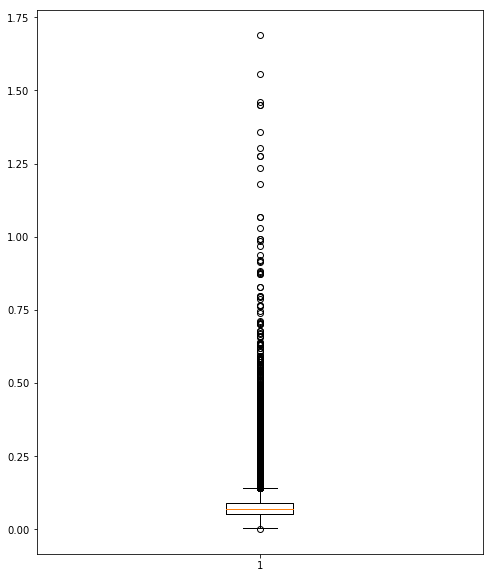

In [79]:
##reshaping the data
data = np.ravel(ma)
import numbers
jun_data = [x for x in data if isinstance (x,numbers.Number)]
#print(data)

fig = plt.figure
fig,ax = plt.subplots(figsize=(8,10))

ax.boxplot(jun_data)
plt.draw()

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/boxplots/boxplot_jun'
plt.savefig(filename1 + '.tif',dpi=300)

#### JULY

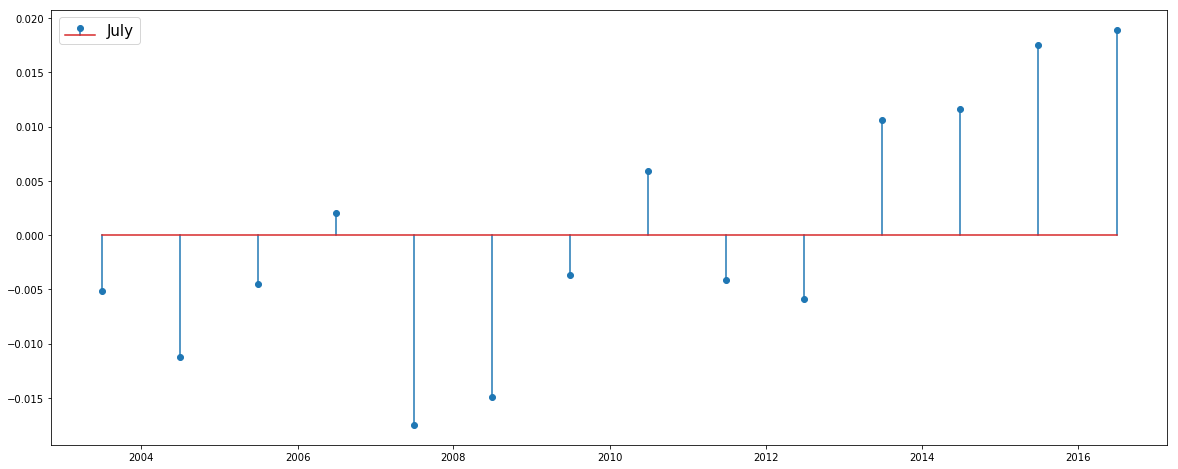

In [80]:
numfiles = len(cdomgiop_jul)
cdomgiop_jul_avg = []
x = []
for ii in range (0,numfiles):
    file = cdomgiop_jul[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    cdomgiop_jul_avg += [avg]
    #print(cdomgiop_jul_avg)
    
    #this is creating the dates for the x axis of the time series
    n = re.compile('(?<=data_)\w+')
    r = n.search(file)
    if r:
        d = r.group(0)
    date = datetime.strptime(d, '%Y_%m')
    x.append(date)
    
    
#calculate the average for all years
jul_all = []
for i in cdomgiop_jul:
    a=np.array(np.loadtxt(i,dtype=float))
    jul_all.append(a)
jul_all = np.array(jul_all).astype(np.float)

ma = np.ma.MaskedArray(jul_all,mask=np.isnan(jul_all))
    #print (ma)

jul_avg = np.nanmean(ma)
jul_std = np.nanstd(ma)
#print(jul_avg)

#calculate the anomalies
z = cdomgiop_jul_avg
z[:]=[x-jul_avg for x in z]
#print (z)
d2 = {'A':x,'B':z}
df2 = pd.DataFrame(data=d2)
df = df.append(df2)
#print(df)

##plotting jul averages
fig = plt.figure(figsize=(20,8)) 
plt.stem(x,z)
plt.legend(['July'],prop={'size':15})
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_jul_anom'
plt.savefig(filename +'.tif',dpi=300)

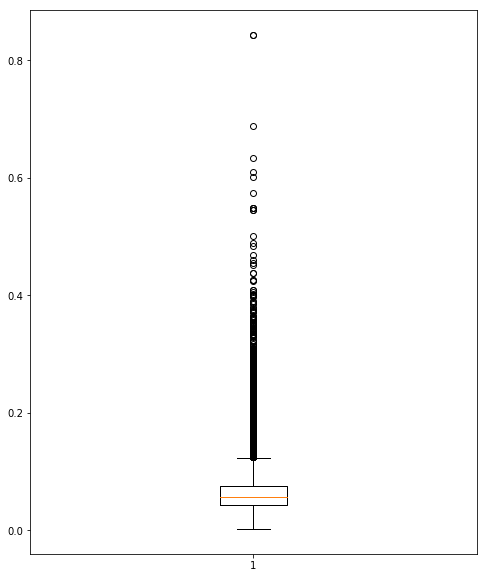

In [81]:
##reshaping the data
data = np.ravel(ma)
import numbers
jul_data = [x for x in data if isinstance (x,numbers.Number)]
#print(data)

fig = plt.figure
fig,ax = plt.subplots(figsize=(8,10))

ax.boxplot(jul_data)
plt.draw()

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/boxplots/boxplot_jul'
plt.savefig(filename1 + '.tif',dpi=300)

#### AUGUST

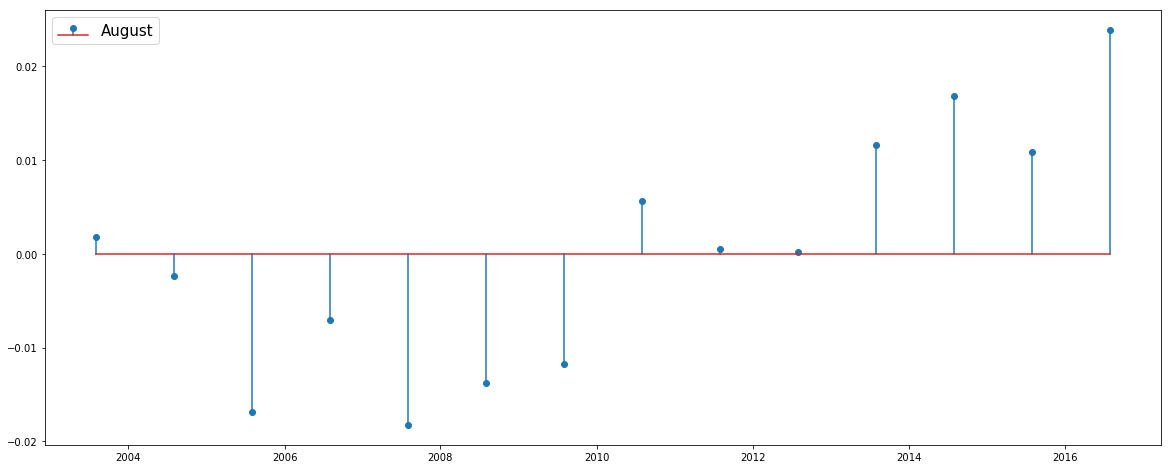

In [82]:
numfiles = len(cdomgiop_aug)
cdomgiop_aug_avg = []
x = []
for ii in range (0,numfiles):
    file = cdomgiop_aug[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    cdomgiop_aug_avg += [avg]
    #print(cdomgiop_aug_avg)
    
    #this is creating the dates for the x axis of the time series
    n = re.compile('(?<=data_)\w+')
    r = n.search(file)
    if r:
        d = r.group(0)
    date = datetime.strptime(d, '%Y_%m')
    x.append(date)
    
    
#calculate the average for all years
aug_all = []
for i in cdomgiop_aug:
    a=np.array(np.loadtxt(i,dtype=float))
    aug_all.append(a)
aug_all = np.array(aug_all).astype(np.float)

ma = np.ma.MaskedArray(aug_all,mask=np.isnan(aug_all))
    #print (ma)

aug_avg = np.nanmean(ma)
aug_std = np.nanstd(ma)
#print(aug_avg)

#calculate the anomalies
z = cdomgiop_aug_avg
z[:]=[x-aug_avg for x in z]
#print (z)
d2 = {'A':x,'B':z}
df2 = pd.DataFrame(data=d2)
df = df.append(df2)
#print(df)

##plotting aug averages
fig = plt.figure(figsize=(20,8)) 
plt.stem(x,z)
plt.legend(['August'],prop={'size':15})
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_aug_anom'
plt.savefig(filename +'.tif',dpi=300)

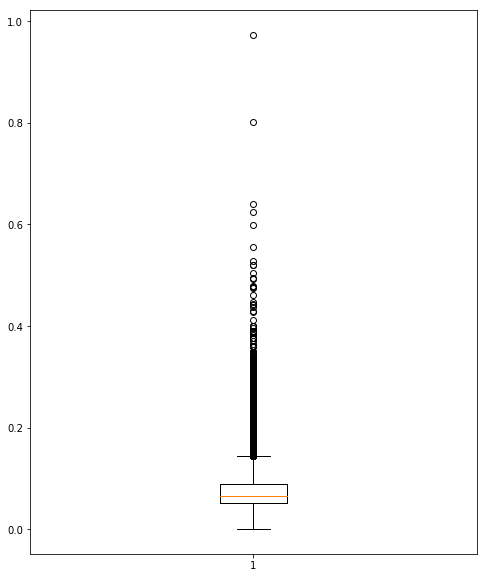

In [83]:
##reshaping the data
data = np.ravel(ma)
import numbers
aug_data = [x for x in data if isinstance (x,numbers.Number)]
#print(data)

fig = plt.figure
fig,ax = plt.subplots(figsize=(8,10))

ax.boxplot(aug_data)
plt.draw()

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/boxplots/boxplot_aug'
plt.savefig(filename1 + '.tif',dpi=300)

#### SEPTEMBER

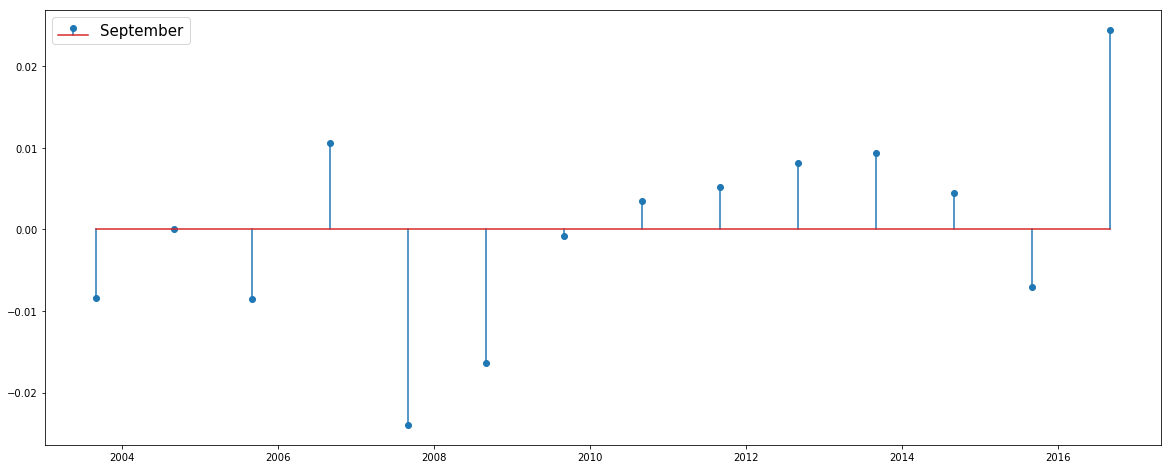

In [84]:
numfiles = len(cdomgiop_sep)
cdomgiop_sep_avg = []
x = []
for ii in range (0,numfiles):
    file = cdomgiop_sep[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    cdomgiop_sep_avg += [avg]
    #print(cdomgiop_sep_avg)
    
    #this is creating the dates for the x axis of the time series
    n = re.compile('(?<=data_)\w+')
    r = n.search(file)
    if r:
        d = r.group(0)
    date = datetime.strptime(d, '%Y_%m')
    x.append(date)
    
    
#calculate the average for all years
sep_all = []
for i in cdomgiop_sep:
    a=np.array(np.loadtxt(i,dtype=float))
    sep_all.append(a)
sep_all = np.array(sep_all).astype(np.float)

ma = np.ma.MaskedArray(sep_all,mask=np.isnan(sep_all))
    #print (ma)

sep_avg = np.nanmean(ma)
sep_std = np.nanstd(ma)
#print(sep_avg)

#calculate the anomalies
z = cdomgiop_sep_avg
z[:]=[x-sep_avg for x in z]
#print (z)
d2 = {'A':x,'B':z}
df2 = pd.DataFrame(data=d2)
df = df.append(df2)
#print(df)

##plotting sep averages
fig = plt.figure(figsize=(20,8)) 
plt.stem(x,z)
plt.legend(['September'],prop={'size':15})
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_sep_anom'
plt.savefig(filename +'.tif',dpi=300)

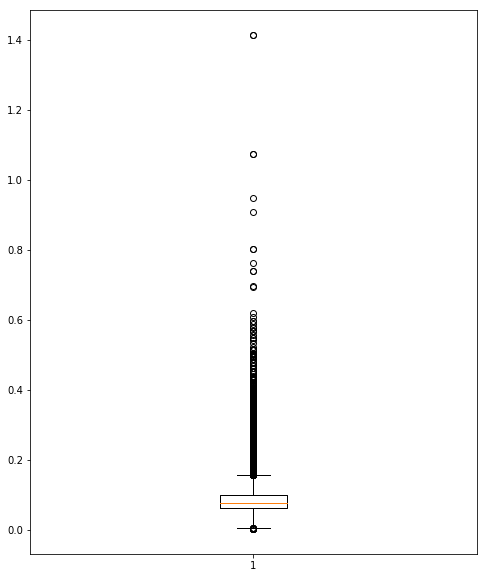

In [85]:
##reshaping the data
data = np.ravel(ma)
import numbers
sep_data = [x for x in data if isinstance (x,numbers.Number)]
#print(data)

fig = plt.figure
fig,ax = plt.subplots(figsize=(8,10))

ax.boxplot(sep_data)
plt.draw()

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/boxplots/boxplot_sep'
plt.savefig(filename1 + '.tif',dpi=300)

#### OCTOBER

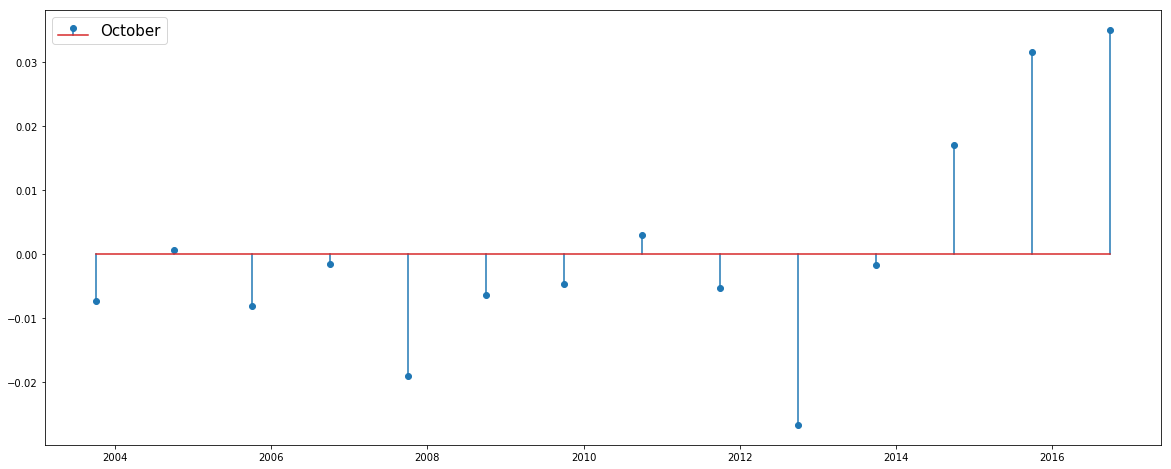

In [86]:
numfiles = len(cdomgiop_oct)
cdomgiop_oct_avg = []
x = []
for ii in range (0,numfiles):
    file = cdomgiop_oct[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    cdomgiop_oct_avg += [avg]
    #print(cdomgiop_oct_avg)
    
    #this is creating the dates for the x axis of the time series
    n = re.compile('(?<=data_)\w+')
    r = n.search(file)
    if r:
        d = r.group(0)
    date = datetime.strptime(d, '%Y_%m')
    x.append(date)
    
    
#calculate the average for all years
oct_all = []
for i in cdomgiop_oct:
    a=np.array(np.loadtxt(i,dtype=float))
    oct_all.append(a)
oct_all = np.array(oct_all).astype(np.float)

ma = np.ma.MaskedArray(oct_all,mask=np.isnan(oct_all))
    #print (ma)

oct_avg = np.nanmean(ma)
oct_std = np.nanstd(ma)
#print(oct_avg)

#calculate the anomalies
z = cdomgiop_oct_avg
z[:]=[x-oct_avg for x in z]
#print (z)
d2 = {'A':x,'B':z}
df2 = pd.DataFrame(data=d2)
df = df.append(df2)
#print(df)

##plotting oct averages
fig = plt.figure(figsize=(20,8)) 
plt.stem(x,z)
plt.legend(['October'],prop={'size':15})
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_oct_anom'
plt.savefig(filename +'.tif',dpi=300)

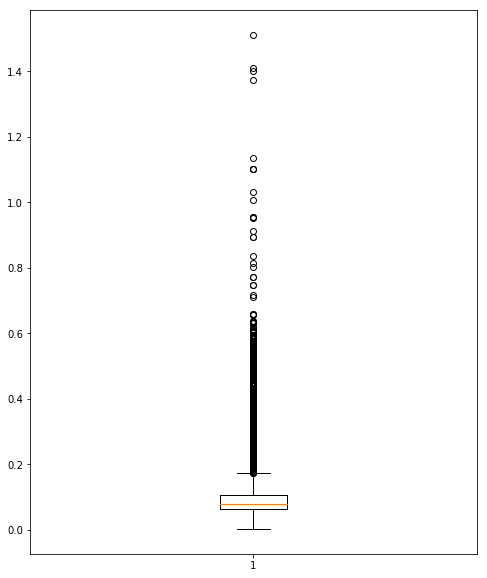

In [87]:
##reshaping the data
data = np.ravel(ma)
import numbers
oct_data = [x for x in data if isinstance (x,numbers.Number)]
#print(data)

fig = plt.figure
fig,ax = plt.subplots(figsize=(8,10))

ax.boxplot(oct_data)
plt.draw()

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/boxplots/boxplot_oct'
plt.savefig(filename1 + '.tif',dpi=300)

#### NOVEMBER

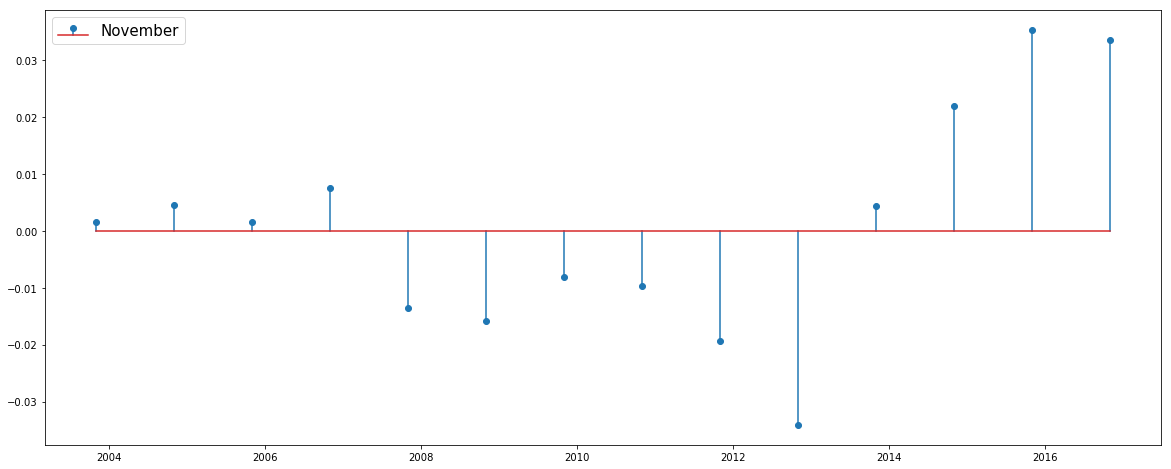

In [88]:
numfiles = len(cdomgiop_nov)
cdomgiop_nov_avg = []
x = []
for ii in range (0,numfiles):
    file = cdomgiop_nov[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    cdomgiop_nov_avg += [avg]
    #print(cdomgiop_nov_avg)
    
    #this is creating the dates for the x axis of the time series
    n = re.compile('(?<=data_)\w+')
    r = n.search(file)
    if r:
        d = r.group(0)
    date = datetime.strptime(d, '%Y_%m')
    x.append(date)
    
    
#calculate the average for all years
nov_all = []
for i in cdomgiop_nov:
    a=np.array(np.loadtxt(i,dtype=float))
    nov_all.append(a)
nov_all = np.array(nov_all).astype(np.float)

ma = np.ma.MaskedArray(nov_all,mask=np.isnan(nov_all))
    #print (ma)

nov_avg = np.nanmean(ma)
nov_std = np.nanstd(ma)
#print(nov_avg)

#calculate the anomalies
z = cdomgiop_nov_avg
z[:]=[x-nov_avg for x in z]
#print (z)
d2 = {'A':x,'B':z}
df2 = pd.DataFrame(data=d2)
df = df.append(df2)
#print(df)

##plotting nov averages
fig = plt.figure(figsize=(20,8)) 
plt.stem(x,z)
plt.legend(['November'],prop={'size':15})
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_nov_anom'
plt.savefig(filename +'.tif',dpi=300)

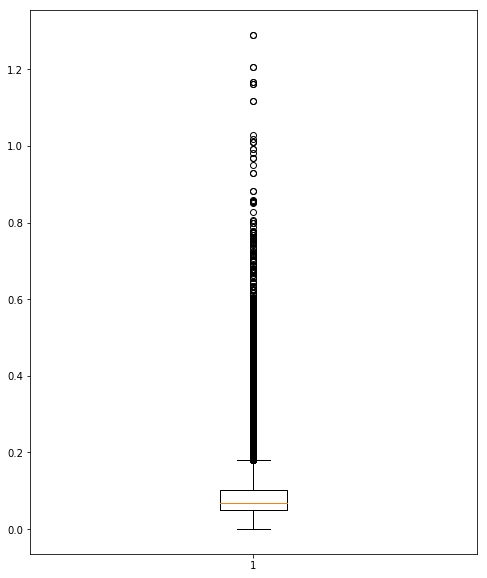

In [89]:
##reshaping the data
data = np.ravel(ma)
import numbers
nov_data = [x for x in data if isinstance (x,numbers.Number)]
#print(data)

fig = plt.figure
fig,ax = plt.subplots(figsize=(8,10))

ax.boxplot(nov_data)
plt.draw()

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/boxplots/boxplot_nov'
plt.savefig(filename1 + '.tif',dpi=300)

#### DECEMBER

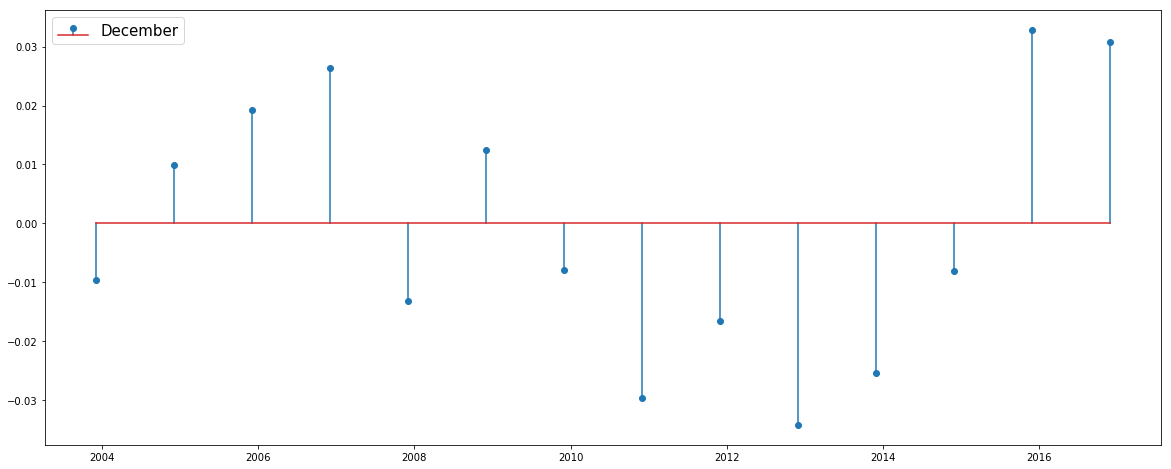

In [90]:
numfiles = len(cdomgiop_dec)
cdomgiop_dec_avg = []
x = []
for ii in range (0,numfiles):
    file = cdomgiop_dec[ii]
    data = np.loadtxt(file)     
    #print (data)              h

    data_=np.array(data).astype(np.float)
    #print (data_)

    ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
    #print (ma)

    avg = np.nanmean(ma)
    #print (avg)

    cdomgiop_dec_avg += [avg]
    #print(cdomgiop_dec_avg)
    
    #this is creating the dates for the x axis of the time series
    n = re.compile('(?<=data_)\w+')
    r = n.search(file)
    if r:
        d = r.group(0)
    date = datetime.strptime(d, '%Y_%m')
    x.append(date)
    
    
#calculate the average for all years
dec_all = []
for i in cdomgiop_dec:
    a=np.array(np.loadtxt(i,dtype=float))
    dec_all.append(a)
dec_all = np.array(dec_all).astype(np.float)

ma = np.ma.MaskedArray(dec_all,mask=np.isnan(dec_all))
    #print (ma)

dec_avg = np.nanmean(ma)
dec_std = np.nanstd(ma)
#print(dec_avg)

#calculate the anomalies
z = cdomgiop_dec_avg
z[:]=[x-dec_avg for x in z]
#print (z)
d2 = {'A':x,'B':z}
df2 = pd.DataFrame(data=d2)
df = df.append(df2)
#print(df)

##plotting dec averages
fig = plt.figure(figsize=(20,8)) 
plt.stem(x,z)
plt.legend(['December'],prop={'size':15})
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_dec_anom'
plt.savefig(filename +'.tif',dpi=300)

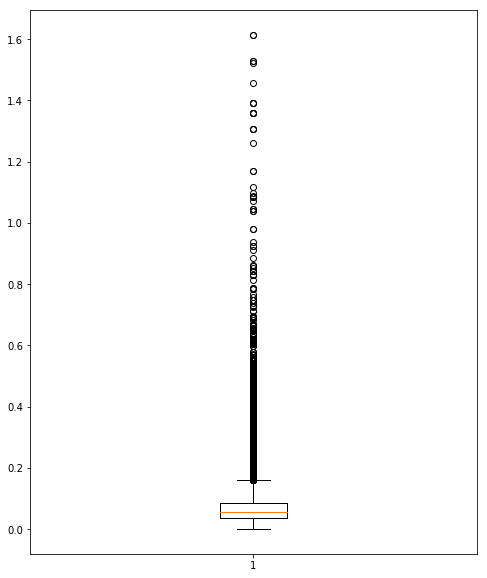

In [91]:
##reshaping the data
data = np.ravel(ma)
import numbers
dec_data = [x for x in data if isinstance (x,numbers.Number)]
#print(data)

fig = plt.figure
fig,ax = plt.subplots(figsize=(8,10))

ax.boxplot(dec_data)
plt.draw()

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/boxplots/boxplot_dec'
plt.savefig(filename1 + '.tif',dpi=300)

### Whole Year

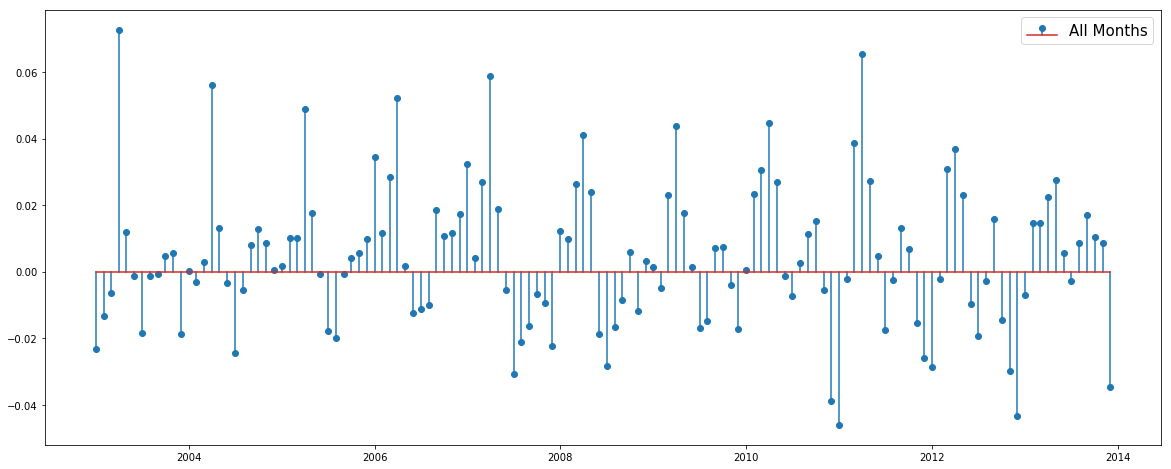

In [92]:
#specify the directory where all the files are saved
cdom_giopdir= '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/giop'

#list all the files in the directory using the os module
cdom_giop_all=os.listdir(cdom_giopdir)


#pull just the files that are data not lat or lon
datafiles=[]
for ff in cdom_giop_all:
    M = re.search('_data_',ff)
    if M:
        datafiles += [ff]


##this loop calculates the average across the GoM for each month
#number of files
numfiles = len(datafiles)
       
#looping through each file, doing as detailed in the above 
#section for subsetting data

cdomgiop_avg = []

x = []
for yr in range(2003,2014):  
    fn = 'adg443.giop_subset_data_'+ str(yr)
    
    for mn in range (1,13):
        fnm = fn + '_' + str(mn)
        #print (fnm) ##this gives all the files names
            
        #data = open(fnm,'r')
        data = np.loadtxt(fnm)
        #data = np.genfromtxt(fnm)
        #print (data)              ##here is where it goes to only the 12th month

        data_=np.array(data).astype(np.float)
        #print (data_)

        ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
        #print (ma)

        avg = np.nanmean(ma)
        #print (avg)
       


        cdomgiop_avg += [avg]
        #print(cdomgiop_avg)

        #this is creating the dates for the x axis of the time series
        time = str(mn) + '_' + str(yr)
        date = datetime.strptime(time, '%m_%Y')
        x.append(date)

    
    
#calculate the average for all years
avgs_all = []
for i in datafiles:
    a=np.array(np.genfromtxt(i))
    avgs_all.append(a)
    
avgs_all = np.array(avgs_all).astype(np.float)

ma = np.ma.MaskedArray(avgs_all,mask=np.isnan(avgs_all))
    #print (ma)

all_avg = np.nanmean(ma)
#print(all_avg)

#calculate the anomalies
z = cdomgiop_avg
z[:]=[x-jun_avg for x in z]
#print (z)


##plotting jun averages
fig = plt.figure(figsize=(20,8)) 
plt.stem(x,z)
plt.legend(['All Months'],prop={'size':15})
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_all_anom'
plt.savefig(filename +'.tif',dpi=300)

In [94]:
df = df.sort_values(by='A')
#print(df)
filename = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/cdom_anomalie_df'
np.savetxt(filename, df['B'], fmt='%.8f')

f = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/cdom_anomalie_df'
cdom = np.loadtxt(f)
#print(cdom)

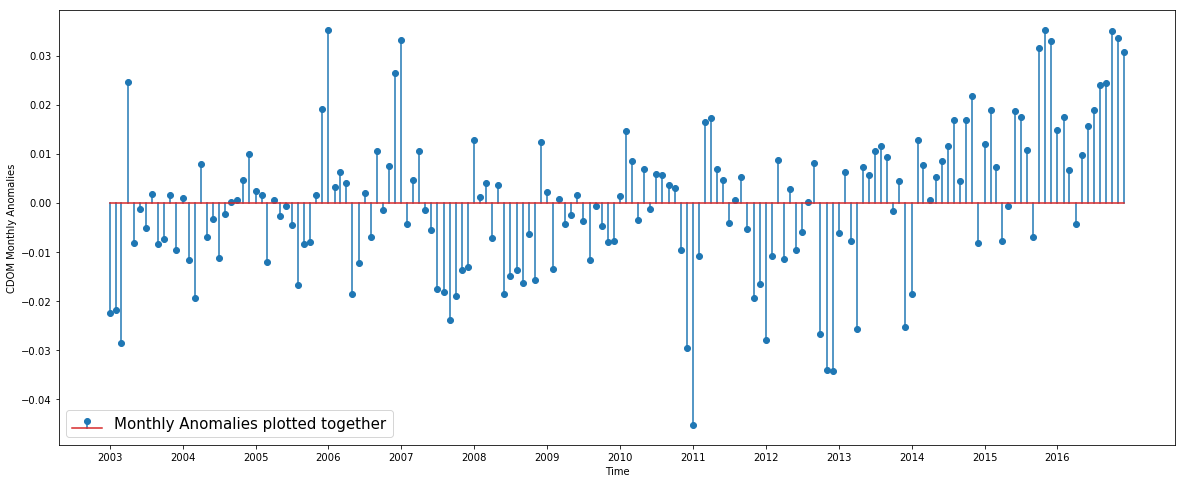

In [95]:
df = df.sort_values(by='A')

#filename = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/cdom_anomalie_df'
#np.savetxt(filename, df['B'], fmt='%.8f')
header = ['A','B']
path = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/'
df.to_csv(path+'cdom_anom_df.csv',sep=',',columns=header)


fig,ax = plt.subplots(figsize=(20,8))                         
plt.stem(df['A'],cdom)
plt.legend(['Monthly Anomalies plotted together'],prop={'size':15})
plt.xticks(years)
ax.set_ylabel('CDOM Monthly Anomalies')
ax.set_xlabel('Time')
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/monthly/cdomgiop_combined_anom'
plt.savefig(filename +'.tif',dpi=300)


### plotting anomalies and climate data

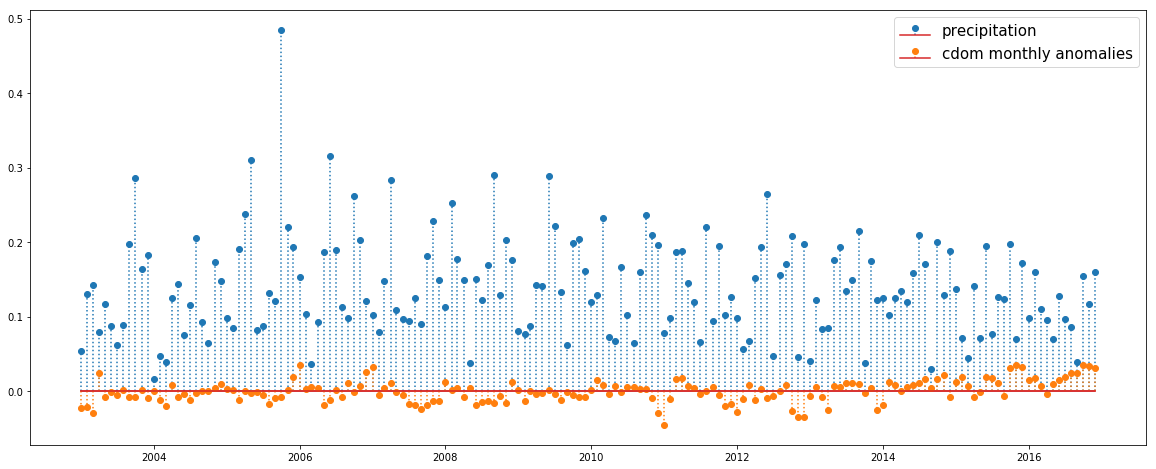

In [96]:
##CDOM anomalies and precipitation
#import precipitation monthly average data
prcp_means = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_means.txt')
pm = np.loadtxt(prcp_means)

##import cdom monthly anomlies plotted together datafram
f = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/cdom_anomalie_df'
cdom = np.loadtxt(f)
#print(cdom)

fig = plt.figure(figsize=(20,8)) 

markerline, stemlines, baseline = plt.stem(df['A'], pm, markerfmt='o', label='precipitation')
plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
plt.setp(stemlines, 'linestyle', 'dotted')


markerline, stemlines, baseline = plt.stem(df['A'],cdom, markerfmt='o', label='cdom monthly anomalies')
plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
plt.setp(stemlines, 'linestyle', 'dotted')

plt.legend(prop={'size':15})
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/anomalies/precipitation_cdom-anom'
plt.savefig(filename +'.tif',dpi=300)

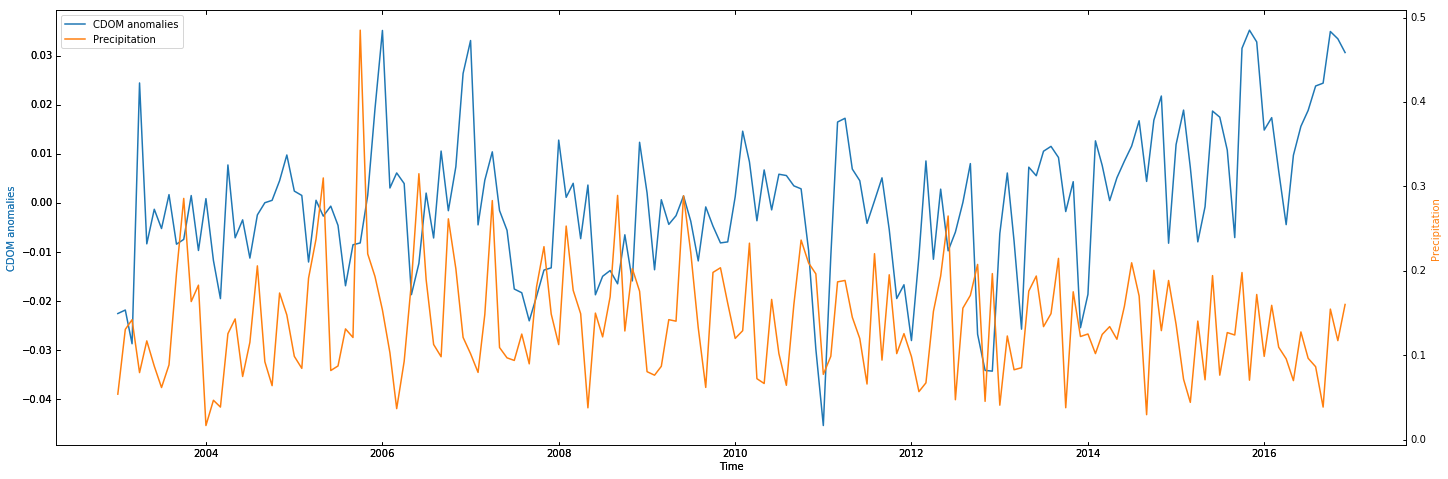

In [97]:
##CDOM anomalies and precipitation
#import precipitation monthly average data
prcp_means = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_means.txt')
pm = np.loadtxt(prcp_means)

##import cdom monthly anomlies plotted together dataframe
f = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/cdom_anomalie_df'
cdom = np.loadtxt(f)





from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

fig1 = plt.figure(figsize=(30,8))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()

host.set_xlabel("Time")
host.set_ylabel("CDOM anomalies")
par1.set_ylabel("Precipitation")

p1, = host.plot(df['A'], cdom, label="CDOM anomalies")
p2, = par1.plot(df['A'], pm, label="Precipitation")


host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())


plt.draw()



#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/timeseries/precip_cdomanom_compare_timeseries'
plt.savefig(filename1 + '.tif', dpi=300)

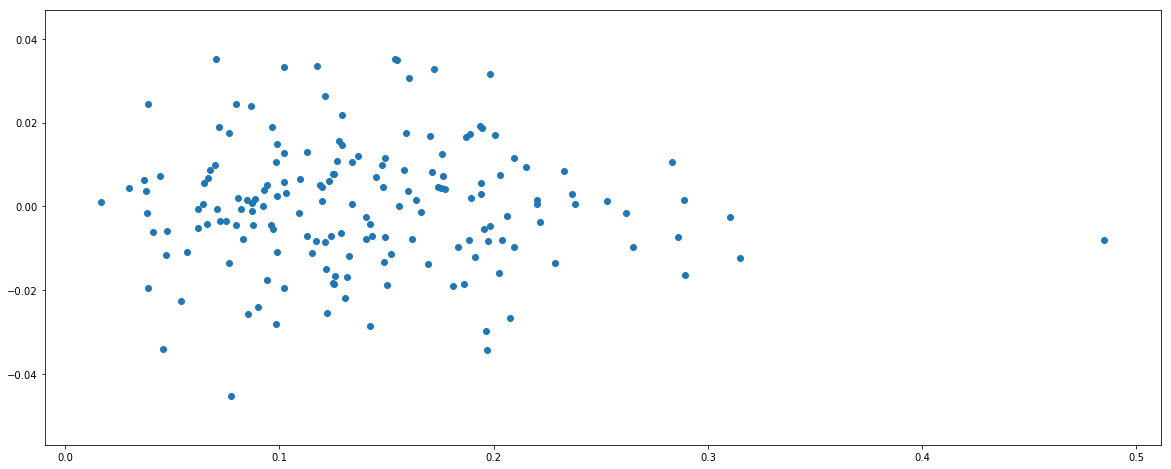

In [98]:
##scatter of precipitation vs. cdom anomalies
import scipy
from scipy import stats

#import precipitation monthly average data
prcp_means = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_means.txt')
pm = np.loadtxt(prcp_means)

##import cdom monthly anomlies plotted together datafram
f = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/cdom_anomalie_df'
cdom = np.loadtxt(f)
#print(cdom.shape)

fig,ax = plt.subplots(1,figsize=(20,8))
y = cdom
x = pm

ax.scatter(x,y)



#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/scatter/precip_cdom-anom_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

#linear regression
#linreg = scipy.stats.linregress(x,y)
#rint(linreg)

### Combine all the boxplots that were created throughout the anomly code

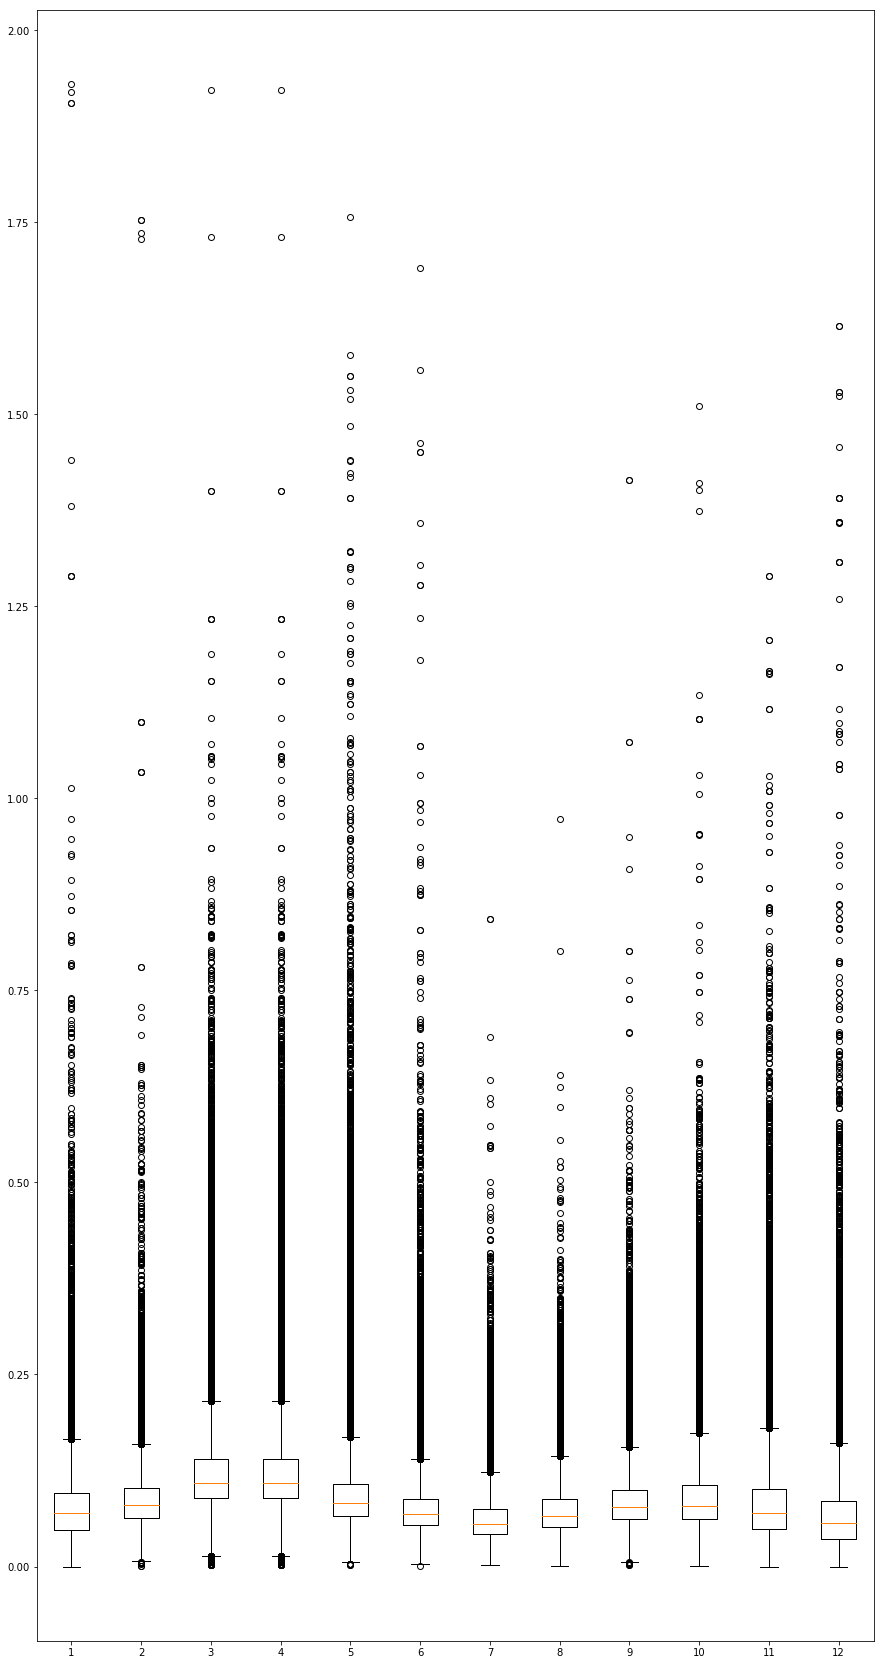

In [99]:
data = [jan_data,feb_data,mar_data,apr_data,may_data,jun_data,jul_data,aug_data,sep_data,oct_data,nov_data,dec_data]
fig,ax = plt.subplots(1,figsize=(15,30))
ax.boxplot(data)

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/boxplots/allmonths_boxplot'
plt.savefig(filename1 + '.tif', dpi=300)

## this calculates just the average and std dev of all years for every month
the data is put in a data frame and exported to a csv. the csv is used in the CDOM data analysis notebook to plot against CDOM and precip

in the anomaly/boxplot data prep section the avg and std are calculated. in the cell below they are put together into a list

In [100]:
#calculate averages for each month
cdomgiop_avgs = []
cdomgiop_stds = []


cdomgiop_avgs += [jan_avg]
cdomgiop_stds += [jan_std]


cdomgiop_avgs += [feb_avg]
cdomgiop_stds += [feb_std]


cdomgiop_avgs += [mar_avg]
cdomgiop_stds += [mar_std]


cdomgiop_avgs += [apr_avg]
cdomgiop_stds += [apr_std]


cdomgiop_avgs += [may_avg]
cdomgiop_stds += [may_std]


cdomgiop_avgs += [jun_avg]
cdomgiop_stds += [jun_std]


cdomgiop_avgs += [jul_avg]
cdomgiop_stds += [jul_std]


cdomgiop_avgs += [aug_avg]
cdomgiop_stds += [aug_std]


cdomgiop_avgs += [sep_avg]
cdomgiop_stds += [sep_std]


cdomgiop_avgs += [oct_avg]
cdomgiop_stds += [oct_std]


cdomgiop_avgs += [nov_avg]
cdomgiop_stds += [nov_std]


cdomgiop_avgs += [dec_avg]
cdomgiop_stds += [dec_std]

print(cdomgiop_avgs)
print(cdomgiop_stds)

[0.077247872053950895, 0.086534051687129729, 0.10020901991207654, 0.1261581245645233, 0.098189364695350057, 0.077977212786046954, 0.064671388844999206, 0.075002147182402376, 0.085787101912464428, 0.090207992242944388, 0.082115747705186398, 0.068761129068716079]
[0.051809169950701013, 0.039795984437616977, 0.046718111820998651, 0.06826725321684271, 0.069667739103540682, 0.046974282248366077, 0.033634359801083528, 0.035739287704698829, 0.038668229640001238, 0.048377889720513226, 0.058545915030466515, 0.058517202770904657]


In [101]:
##this makes the x axis for the plots 
months = ['1','2','3','4','5','6','7','8','9','10','11','12']
m = []
for i in months:
    ii = int(i)
    m += [ii]
print(m)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [102]:
##combines data into data frame
dfcdom= pd.DataFrame()
dfcdom['date'] = m
dfcdom['avgs'] = cdomgiop_avgs
dfcdom['stds'] = cdomgiop_stds
print(dfcdom)

    date      avgs      stds
0      1  0.077248  0.051809
1      2  0.086534  0.039796
2      3  0.100209  0.046718
3      4  0.126158  0.068267
4      5  0.098189  0.069668
5      6  0.077977  0.046974
6      7  0.064671  0.033634
7      8  0.075002  0.035739
8      9  0.085787  0.038668
9     10  0.090208  0.048378
10    11  0.082116  0.058546
11    12  0.068761  0.058517


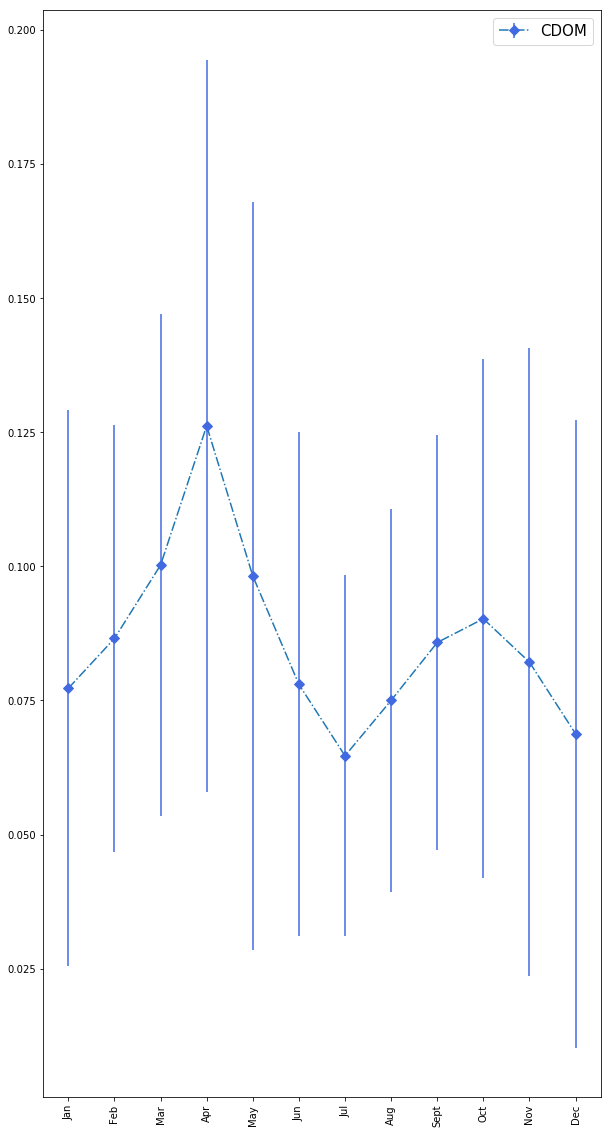

In [105]:
#plot the CDOM
fig1 = plt.figure(figsize=(10,20))
plt.errorbar(dfcdom['date'],dfcdom['avgs'],yerr = dfcdom['stds'],marker='D',linestyle='-.',markersize=7,
             mfc = 'royalblue',mec='royalblue',ecolor='royalblue')
plt.legend(['CDOM'],prop={'size':15})
label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.xticks(dfcdom['date'],label,rotation='vertical')
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/CDOM_1yr'
plt.savefig(filename +'.tif',dpi=300)

In [106]:
#importing the precip data
path='/Users/clarabirdferrer/Documents/Bigelow/Data/climate'
dfprcp = pd.read_csv(path+'prcp_1year.csv',sep=',',header=(1),names=['date','avgs','std'])

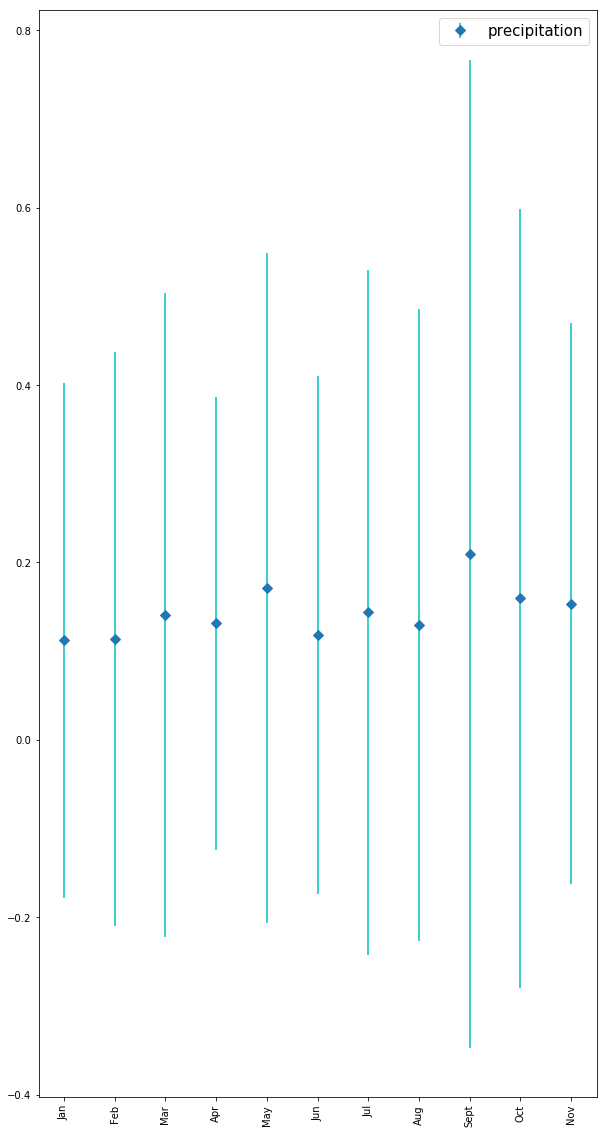

In [107]:
fig1 = plt.figure(figsize=(10,20))
plt.errorbar(dfprcp['date'],dfprcp['avgs'],yerr = dfprcp['std'],marker='D',linestyle='',markersize=7,ecolor='c')
plt.legend(['precipitation'],prop={'size':15})
label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.xticks(dfprcp['date'],label,rotation='vertical')
#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/precip_1yr'
plt.savefig(filename +'.tif',dpi=300)

In [108]:
#importing the kd490 data
path='/Users/clarabirdferrer/Documents/Bigelow/Data/'
dfkd = pd.read_csv(path+'kd_1yr.csv',sep=',',header=(1),names=['date','avgs','std'])

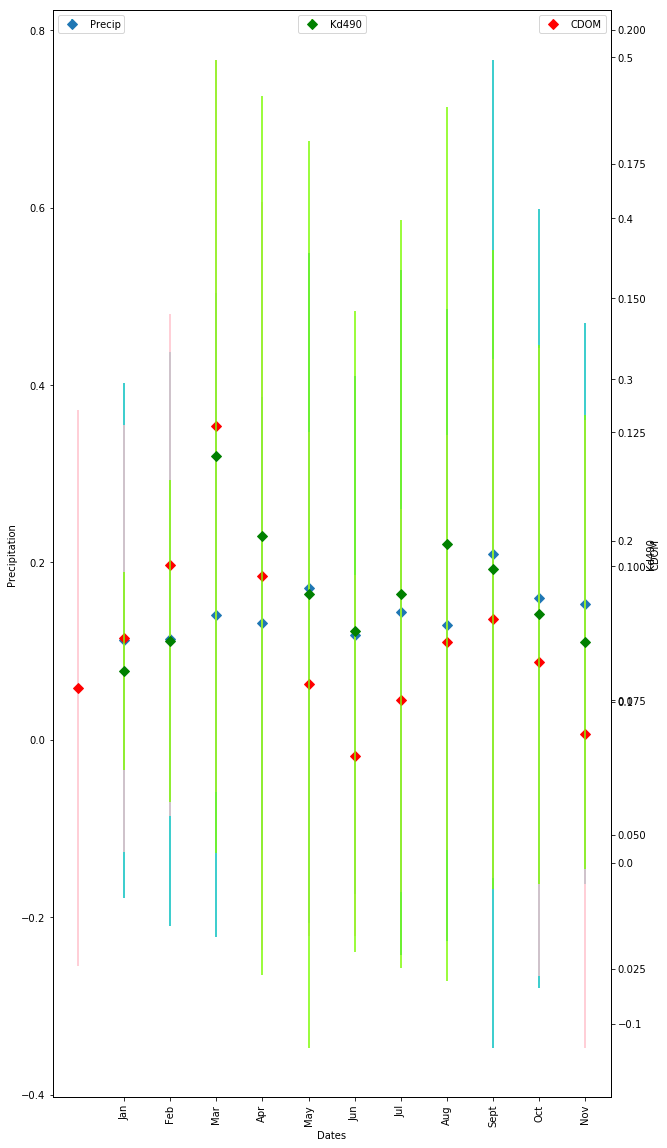

In [109]:
#plot CDOM, kd490, precip together
fig1 = plt.figure(figsize=(10,20))

ax1 = plt.gca()
ax1.errorbar(dfprcp['date'],dfprcp['avgs'],yerr = dfprcp['std'],marker='D',linestyle='',markersize=7,ecolor='c')
label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.legend(["Precip"],loc=2)
plt.xticks(dfprcp['date'],label,rotation='vertical')

ax2 = ax1.twinx()
ax2.errorbar(dfcdom['date'],dfcdom['avgs'],yerr = dfcdom['stds'],marker='D',linestyle='',markersize=7,
             mfc = 'red',mec='red',ecolor='pink')
plt.legend(["CDOM"],loc=0)

ax3 = ax1.twinx()
ax3.errorbar(dfkd['date'],dfkd['avgs'],yerr = dfkd['std'],marker='D',linestyle='',markersize=7,
             mfc = 'green',mec='green',ecolor='lawngreen')
plt.legend(["Kd490"],loc=9)



ax1.set_xlabel("Dates")
ax1.set_ylabel("Precipitation")
ax2.set_ylabel("CDOM")
ax3.set_ylabel("Kd490")


plt.draw()



#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/kd_cdom_climate/CDOM_precip_kd_1yr'
plt.savefig(filename +'.tif',dpi=300)


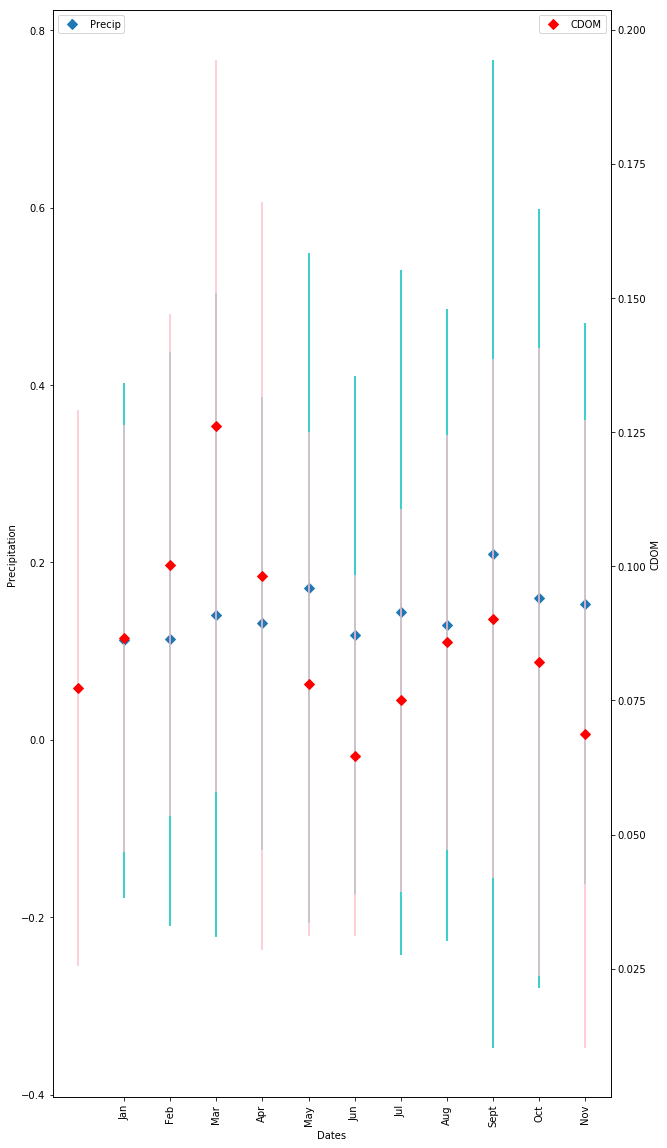

In [110]:
#precip and CDOM
fig1 = plt.figure(figsize=(10,20))

ax1 = plt.gca()
ax1.errorbar(dfprcp['date'],dfprcp['avgs'],yerr = dfprcp['std'],marker='D',linestyle='',markersize=7,ecolor='c')
label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.legend(["Precip"],loc=2)
plt.xticks(dfprcp['date'],label,rotation='vertical')

ax2 = ax1.twinx()
ax2.errorbar(dfcdom['date'],dfcdom['avgs'],yerr = dfcdom['stds'],marker='D',linestyle='',markersize=7,
             mfc = 'red',mec='red',ecolor='pink')
plt.legend(["CDOM"],loc=0)


ax1.set_xlabel("Dates")
ax1.set_ylabel("Precipitation")
ax2.set_ylabel("CDOM")


plt.draw()

#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/CDOM_precip_1yr'
plt.savefig(filename +'.tif',dpi=300)


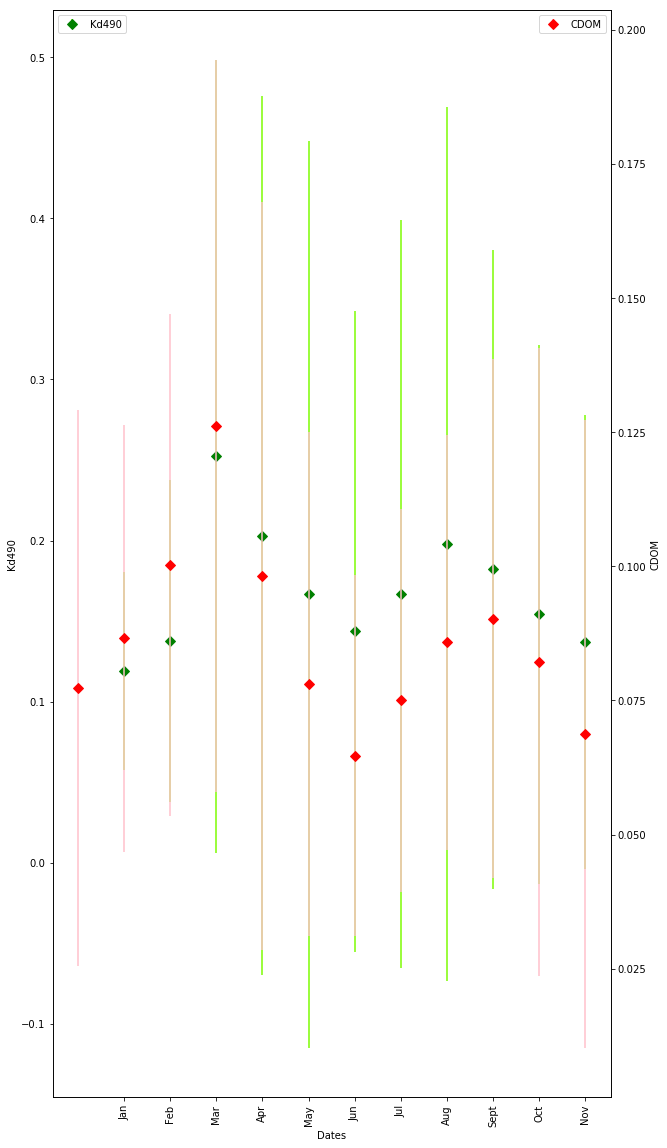

In [111]:
#kd490 and CDOM
fig1 = plt.figure(figsize=(10,20))

ax1 = plt.gca()
ax1.errorbar(dfkd['date'],dfkd['avgs'],yerr = dfkd['std'],marker='D',linestyle='',markersize=7,
             mfc = 'green',mec='green',ecolor='lawngreen')
label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.xticks(dfprcp['date'],label,rotation='vertical')
plt.legend(["Kd490"],loc=2)


ax2 = ax1.twinx()
ax2.errorbar(dfcdom['date'],dfcdom['avgs'],yerr = dfcdom['stds'],marker='D',linestyle='',markersize=7,
             mfc = 'red',mec='red',ecolor='pink')
plt.legend(["CDOM"],loc=0)


ax1.set_xlabel("Dates")
ax1.set_ylabel("Kd490")
ax2.set_ylabel("CDOM")


plt.draw()


#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/CDOM_kd_1yr'
plt.savefig(filename +'.tif',dpi=300)


## FFT on monthly anomalies?

In [112]:
#numeric python module, useful for handling large data arrays
import numpy as np

import pandas as pd

#module for dealing with netCDF files (all sat files are netCDF)
import netCDF4 as nc

#modules for making plots. Here wer are importing the full matplotlib
#module, but also the sub-module pyplot separately with an abbreviated
#name so it is easier to use in the code
import matplotlib.pyplot as plt
import matplotlib

#panda
import pandas as pd


#import datetime
import datetime
from datetime import datetime

#for displaying the plots in this notebook 
%matplotlib inline

#module for making maps
from mpl_toolkits.basemap import Basemap

#miscellaneous operating system interfaces module for doing things like
#moving file, exploring directory paths, etc..
import os
import re

##import the FFT module
from numpy import fft

In [113]:
#specify the directory where all the files are saved
cdom_giopdir= '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/subsets/giop'

#list all the files in the directory using the os module
cdom_giop_all=os.listdir(cdom_giopdir)


#pull just the files that are data not lat or lon
datafiles=[]
for ff in cdom_giop_all:
    M = re.search('_data_',ff)
    if M:
        datafiles += [ff]


##this loop calculates the average across the GoM for each month
#number of files
numfiles = len(datafiles)
       
#looping through each file, doing as detailed in the above 
#section for subsetting data

cdomgiop_avg = []

x = []
for yr in range(2003,2017):  
    fn = 'adg443.giop_subset_data_'+ str(yr)
    
    for mn in range (1,13):
        fnm = fn + '_' + str(mn)
        #print (fnm) ##this gives all the files names
            
        #data = open(fnm,'r')
        data = np.loadtxt(fnm)
        #data = np.genfromtxt(fnm)
        #print (data)              ##here is where it goes to only the 12th month

        data_=np.array(data).astype(np.float)
        #print (data_)

        ma = np.ma.MaskedArray(data,mask=np.isnan(data_))
        #print (ma)

        avg = np.nanmean(ma)
        #print (avg)
       


        cdomgiop_avg += [avg]
        #print(cdomgiop_avg)

        #this is creating the dates for the x axis of the time series
        time = str(mn) + '_' + str(yr)
        date = datetime.strptime(time, '%m_%Y')
        x.append(date)

        #print(cdomgiop_avg)

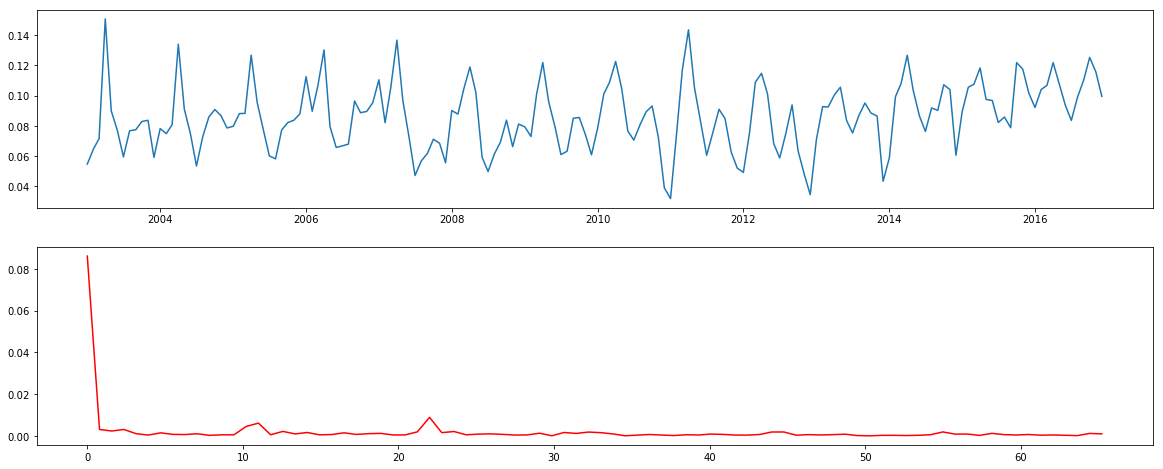

In [114]:
from numpy import fft
Fs= 132  #sampling rate ##1 data point per month but maybe should be 12 (in R it would be b/c 12 months per year)
Ts = 1/Fs #the hell is a sampling interval
t = x #time vector

y = cdomgiop_avg      #signal
n = len(y) #length of signal

k=np.arange(n) #returns evenly spaced values w/in given interval
T= n/Fs #length of signal/sampling frequency

frq = k/T #two sides of frequency range
frq = frq[range(n//2)]   #one side frequency range


Y=np.fft.fft(y)/n  ##fft computing and normalization
Y = Y[range(n//2)]

fig,ax = plt.subplots(2,1,figsize=(20,8))
ax[0].plot(t,y) #CDOM avg time series
ax[1].plot(frq,abs(Y),'r') #plotting the spectrum
plt.plot()

#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/FFT/cdomgiop_FFT'
plt.savefig(filename +'.tif',dpi=300)

d = {'N':Y,'M':frq}
df = pd.DataFrame(data=d)
#print(df)

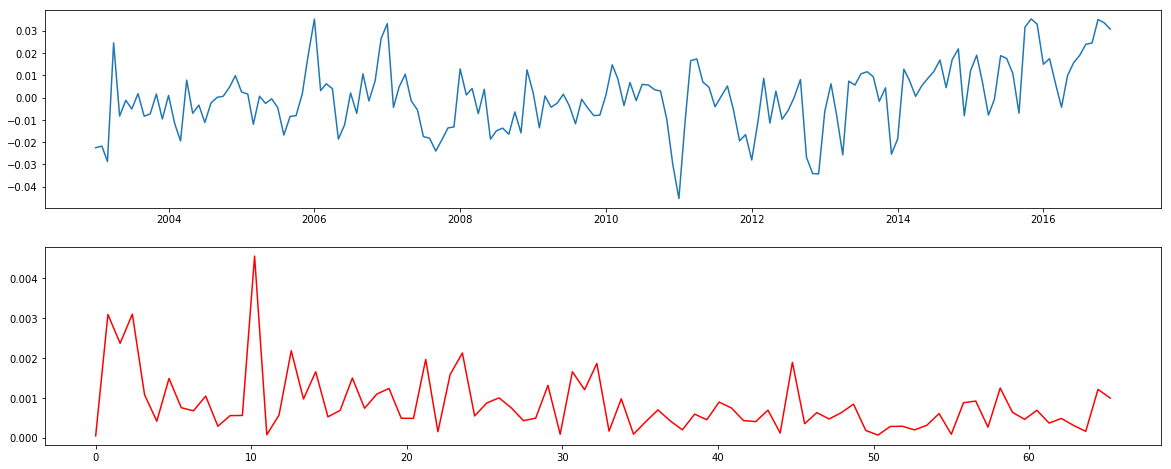

In [115]:
##FFT on CDOM monthly anomalies

f = '/Users/clarabirdferrer/Documents/Bigelow/SatelliteData/CDOM/cdom_anomalie_df'
cdom = np.loadtxt(f)

from numpy import fft
Fs= 132  #sampling rate ##1 data point per month but maybe should be 12 (in R it would be b/c 12 months per year)
Ts = 1/Fs #the hell is a sampling interval
t = x #time vector

y = cdom      #signal
n = len(y) #length of signal

k=np.arange(n) #returns evenly spaced values w/in given interval
T= n/Fs #length of signal/sampling frequency

frq = k/T #two sides of frequency range
frq = frq[range(n//2)]   #one side frequency range


Y=np.fft.fft(y)/n  ##fft computing and normalization
Y = Y[range(n//2)]

fig,ax = plt.subplots(2,1,figsize=(20,8))

ax[0].plot(t,y) #CDOM avg time series
ax[1].plot(frq,abs(Y),'r') #plotting the spectrum
plt.plot()

#save the file
filename = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/FFT/cdomgiop_anom_FFT'
plt.savefig(filename +'.tif',dpi=300)

## Cross Correlation Analysis

CDOM vs. precip

In [116]:
#import precipitation monthly average data
prcp_means = ('/Users/clarabirdferrer/Documents/Bigelow/Data/climate/prcp_means.txt')
pm = np.loadtxt(prcp_means)
#import cdom??
#cross correaltion - mode=valid
crosscorr_valid = np.correlate(cdomgiop_avg,pm,mode='valid')
#cross correlation - mode = full
crosscorr_full = np.correlate(cdomgiop_avg,pm,mode='full')

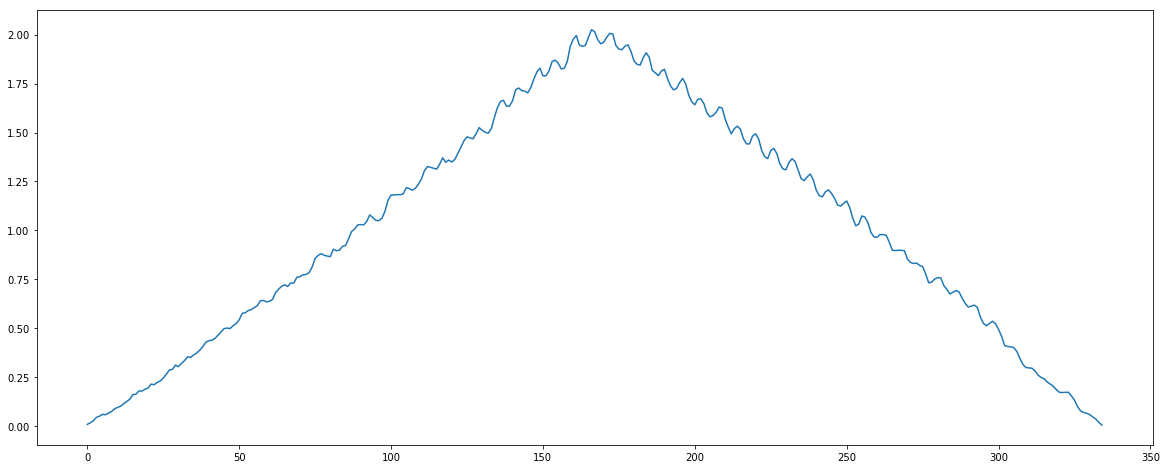

In [117]:
#plot cross correlation full method
fig1 = plt.figure(figsize=(20,8)) 
plt.plot(crosscorr_full)

In [118]:
print(crosscorr_valid)

[ 2.01546905]


In [119]:
##time delay between the 2 signals is determined by the argument of the maximum of the cross correlation
maximum = np.argmax(crosscorr_full)
print(maximum)

166


CDOM autocorrelation

In [120]:
autocorr = np.correlate(cdomgiop_avg,cdomgiop_avg,mode='same')

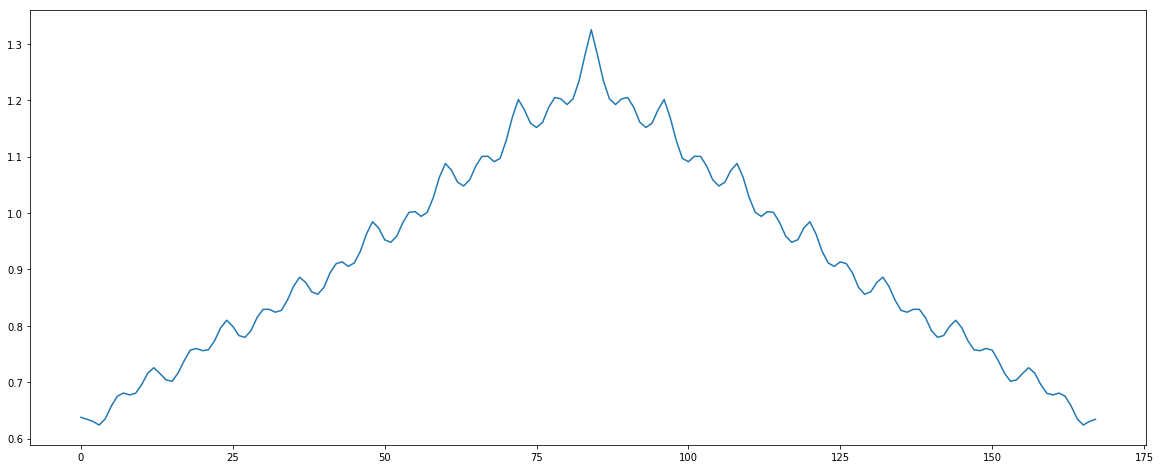

In [121]:
#plot cross correlation full method
fig1 = plt.figure(figsize=(20,8)) 
plt.plot(autocorr)

In [122]:
##time delay between the 2 signals is determined by the argument of the maximum of the cross correlation
maximum = np.argmax(autocorr)
print(maximum)

84


## 2005
this section pulls out the data for just 2005. This resulted from the matchup plot that showed that 2005 was a high CDOM year.

          A         B
24  2005-01  0.079716
25  2005-02  0.088115
26  2005-03  0.088218
27  2005-04  0.126755
28  2005-05  0.095553
29  2005-06  0.077382
30  2005-07  0.060146
31  2005-08  0.058169
32  2005-09  0.077307
33  2005-10  0.082106
34  2005-11  0.083725
35  2005-12  0.087933


([<matplotlib.axis.XTick at 0x12282d208>,
 <a list of 12 Text xticklabel objects>)

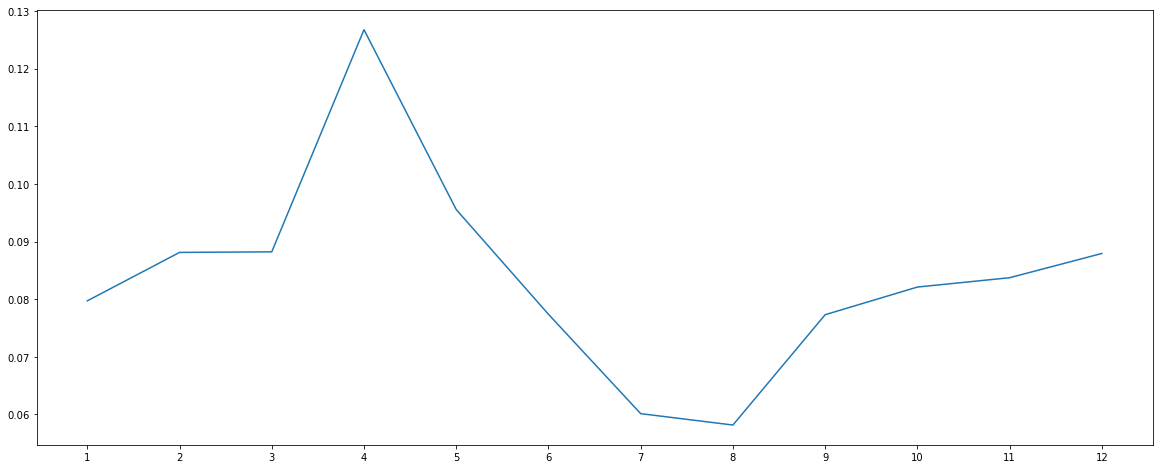

In [124]:
c2005 = []
other = []
for i in df_cdom['A']:
    yr = i[:4]
    if yr == '2005':
        c2005 += [i]
    else:
        other += [i]

#Pull out the CDOM data and plot the monthly averages for the year
cdom05 = df_cdom.loc[df_cdom['A'].isin(c2005)]
print(cdom05)
mn = []
for i in cdom05['A']:
    m = i[5:]
    mn += [m]
fig1 = plt.figure(figsize=(20,8))
plt.plot(mn,cdom05['B'])
months = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks(months)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)

         Date  ag440[1/m]
0  2005-06-08    0.235002
1  2005-07-20    0.121945
2  2005-07-21    0.123013
3  2005-09-02    0.104664
4  2005-09-03    0.081534
5  2005-10-03    0.141284
6  2005-10-04    0.117297


/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


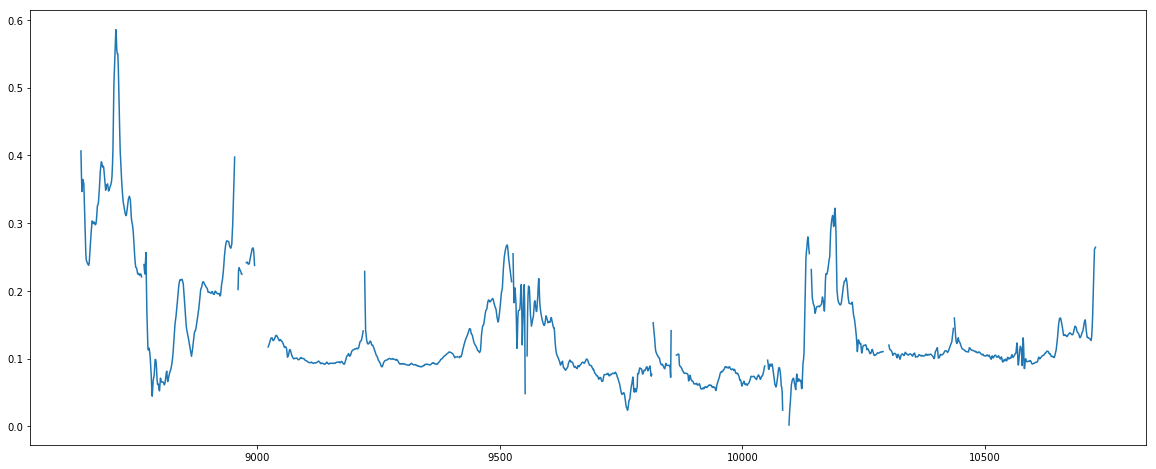

In [126]:
##pull out the gnats 2005 data and plot

path = '/Users/clarabirdferrer/Documents/Bigelow/Data/GNATS/'
dfgn = pd.read_csv(path+'GNATS_date_cdom.csv',sep=',',header=(0))
g2005 = []
meh = []
#select just the 2005 years
for i in dfgn['DateTime']:
    yr = i[:4]
    if yr == '2005':
        g2005 += [i]
    else:
        meh += [i]
        
#find the gnats values in 2005        
gnat05 = dfgn.loc[dfgn['DateTime'].isin(g2005)]

#make all values <0 NaN
ag = gnat05['ag440[1/m]']
ag[ag < 0] = np.nan

date = []
dd = []
for i in gnat05['DateTime']:   ##make the month/date date column so you can get the daily mean using groupby
    ii = str(i)
    dt = ii[:10]
    dd += [dt]
    dt = pd.to_datetime(i)
    date += [dt] 

gnat05['date'] = date
gnat05['Date'] = dd
dfgnat05 = gnat05.groupby('Date',as_index=False)['ag440[1/m]'].mean()
print(dfgnat05)
#print(df)
fig1 = plt.figure(figsize=(20,8))
plt.plot(gnat05['ag440[1/m]'])



In [128]:
##export the csvs because its easier to create some of the plots in excel
path = '/Users/clarabirdferrer/Documents/Bigelow/Data/GNATS/'
header = ['DateTime','ag440[1/m]']
gnat05.to_csv(path+'gnats2005.csv',columns=header)


header = ['Date','ag440[1/m]']
dfgnat05.to_csv(path+'gnats2005_avgs.csv',columns=header)